<a href="https://colab.research.google.com/github/itoshiyanazawa/cnn_project/blob/main/main_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
# download tensorflow 2.15
!pip install tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully unin

In [ ]:
!pip install keras
!pip install opencv-python

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import keras
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# check tf version
tf.__version__

'2.15.0'

# Step 1

1. Load the CIFAR-10 dataset (You can use libraries like TensorFlow/Keras or PyTorch to load
the dataset.)
2. Explore the dataset (e.g., visualize some images, check the class distribution).
3. Use proper transformation on your data if required.
4. Normalize the image data.
5. Split the data into training, validation and test sets.


This code snippet handles the initial **loading, combining, and stratified splitting** of the CIFAR-10 dataset.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Set a seed value
SEED = 42

# Set the seed for NumPy
np.random.seed(SEED)

# Set the seed for TensorFlow
tf.random.set_seed(SEED)

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Combine train and test data
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# 3. Function to split data equally
def split_data_equally(x, y, train_ratio=0.8):
    num_classes = 10
    indices = []
    for i in range(num_classes):
        idx = np.where(y == i)[0]
        np.random.shuffle(idx)
        split = int(len(idx) * train_ratio)
        indices.append((idx[:split], idx[split:]))

    train_indices = np.concatenate([i[0] for i in indices])
    val_indices = np.concatenate([i[1] for i in indices])

    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)

    return x[train_indices], y[train_indices], x[val_indices], y[val_indices]

# 4. Split the data
x_train, y_train, x_val, y_val = split_data_equally(x_all, y_all)

# 5. Verify class distribution
def count_classes(y):
    return np.bincount(y.flatten())

print("Train set class distribution:", count_classes(y_train))
print("Validation set class distribution:", count_classes(y_val))
print("Test set class distribution:", count_classes(y_test))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train set class distribution: [4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
Validation set class distribution: [1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]
Test set class distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


This code prints the shape of the training, validation, and test datasets to confirm that:

* All images are 32×32 pixels in size.
* All datasets have the expected number of samples.
* The channel dimension reflects whether the data is RGB (3 channels) or grayscale (1 channel).

In [ ]:
print('Image size of x_train: ', x_train.shape)
print('Image size of x_val: ', x_val.shape)
print('Image size of x_test: ', x_test.shape)

Image size of x_train:  (48000, 32, 32, 3)
Image size of x_val:  (12000, 32, 32, 3)
Image size of x_test:  (10000, 32, 32, 3)


This mapping is used to display class names when visualizing or evaluating images.

In [ ]:
# Class label with its corresponding integer
# cifar10_labels = {
#     0: "airplane",
#     1: "automobile",
#     2: "bird",
#     3: "cat",
#     4: "deer",
#     5: "dog",
#     6: "frog",
#     7: "horse",
#     8: "ship",
#     9: "truck"
# }


This cell visualizes **25 random images** from the training set in a 5×5 grid, along with their corresponding class labels.

The purpose of doing is to:

* Provide a visual sanity check on the dataset.
* Help confirm that the data was loaded correctly and that class labels align with the images.
* Spotting issues like incorrect labeling, low image quality, or unusual patterns.

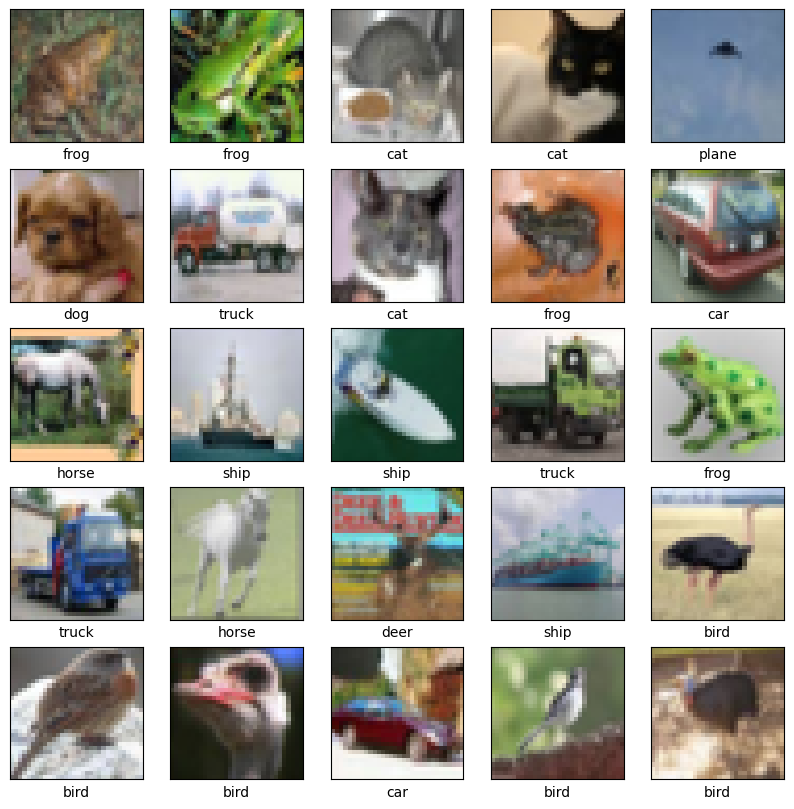

In [ ]:
# Visualize images
import matplotlib.pyplot as plt


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.show()



To prepare the image data for model training, all pixel values are normalized to fall within the range [0, 1].



In [ ]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0


In this step, we convert all RGB images to grayscale using TensorFlow's built-in function:

Why Grayscale?

For this task, object shape and structure are more critical than color.

Using grayscale reduces:

* The number of input channels (from 3 to 1)

* The model size and training time






In [ ]:
# Transform into grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
x_val = tf.image.rgb_to_grayscale(x_val)

# Step 2
1. Define the CNN architecture (e.g., using Keras or PyTorch).
2. Explain what type of layers you are including and why (layers like Conv2D, MaxPooling2D,
Flatten, Dense, …)
3. Visualize your CNN architecture
4. Compile the model with appropriate loss function and optimizer. Explain your choice of loos
function and optimizer.
5. Train the model on the training data and validate it on the validation set.
6. Visualize the training process using both training and validation results.

In [ ]:
# Define the CNN architecture
import keras
num_classes = 10
input_shape = (32, 32, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', name='last_conv'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

**Why this architecture**

*   conv2D: To devide data into small pieces (kernel?), repeating it to learn increasingly complex and abstract representations
  *   By increaing the number of filters, it makes CNN learn images in detail (hierarical structure?)
*   ReLu: helps CNN learn non-linear relationship between features and images
*   max_pooling: To capture the most important features on each kernel
*   global_average_pooling: Enforces correspondence between feature maps and categories
*   dropout: To avoid overfitting to the training dataset
*   dense: To learn combination of features from the previous layers
*   softmax: To give probabilities for each class to choose the biggest value as output




In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

**Why these loss function and optimizer**


*   **SparseCategoricalCrossentropy**: This loss function is suitable for multi-class classification, like this 10 class clasification. It computes the cross-entropy loss between the true class labels and the predicted probabilities, ensuring that the model effectively learns to classify images into one of these distinct categories

*   **Adam**: This was chosen because of its adaptive learning rate capabilities, which make it effective for training CNN. Also, it requires less memory and high performance



In [ ]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='best_model.keras', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2),
]

train_progress = model.fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_val, y_val),
    callbacks = callbacks,
)

score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/20
375/375 [==============================] - 120s 316ms/step - loss: 1.9145 - accuracy: 0.2926 - val_loss: 1.5645 - val_accuracy: 0.4378
Epoch 2/20
375/375 [==============================] - 103s 274ms/step - loss: 1.5273 - accuracy: 0.4546 - val_loss: 1.3377 - val_accuracy: 0.5312
Epoch 3/20
375/375 [==============================] - 105s 280ms/step - loss: 1.3158 - accuracy: 0.5405 - val_loss: 1.1639 - val_accuracy: 0.5928
Epoch 4/20
375/375 [==============================] - 101s 269ms/step - loss: 1.1841 - accuracy: 0.5903 - val_loss: 1.0665 - val_accuracy: 0.6203
Epoch 5/20
375/375 [==============================] - 101s 271ms/step - loss: 1.0957 - accuracy: 0.6199 - val_loss: 1.0353 - val_accuracy: 0.6352
Epoch 6/20
375/375 [==============================] - 104s 277ms/step - loss: 1.0079 - accuracy: 0.6531 - val_loss: 0.9590 - val_accuracy: 0.6605
Epoch 7/20
375/375 [==============================] - 103s 275ms/step - loss: 0.9518 - accuracy: 0.6735 - val_loss: 0.9154 -

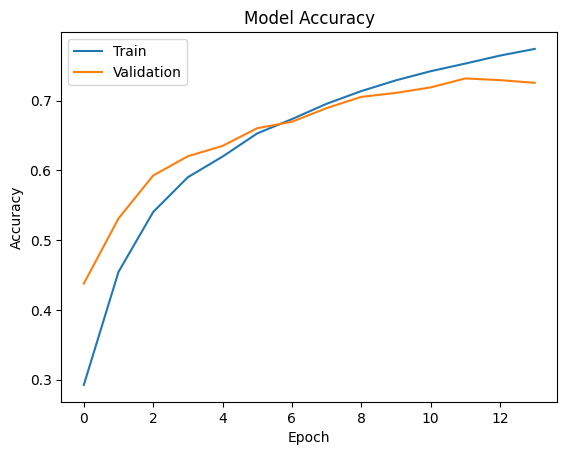

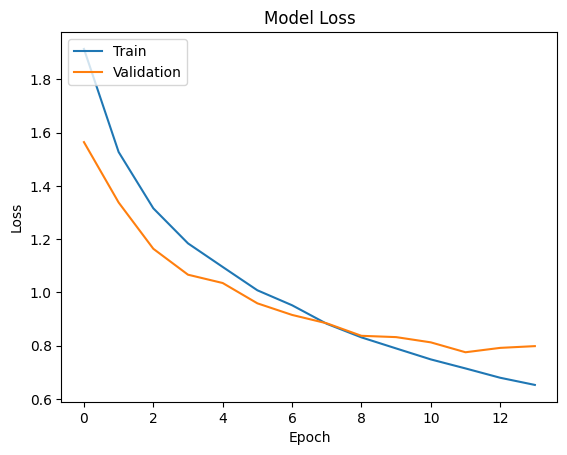

In [ ]:
# Visualize the training process using both training and validation results.
import matplotlib.pyplot as plt

history = train_progress.history

# Plot training and validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 3
**Task**
1. Use the trained model to predict labels for the test set.
2. Compute performance metrics such as accuracy, precision, recall, and F1-score (Explain your
choice).
3. Visualize your confusion matrix.
4. Analyze the results and identify potential improvements.

In [ ]:
# Use the trained model to predict labels for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 6s 18ms/step


**Compute performance**

We applied the following metrics for evaluation for our model.

*   **Accuracy**: To evaluate the overall model performance, check the proportion of the number of correct decision making out of all predictions
*   **Precision**: To assess the model performance if it can identify instances of a particular class correctly
*   **Recall**: To measures the model's ability to identify all instances of a particular class
*   **F1-score**: To balance the trade-off between identifying true positives and minimizing false positives. In this case, we would like to perform well to get true positives, at the same time, minimize misclasification or false positives, so applied this metric






In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

Accuracy: 0.7964
Precision: 0.8023749032116876
Recall: 0.7964
F1 score: 0.7929570737296457


**Performance Analysis**


*   F1 score is below 0.8, so performance of this model is average.
*   Comapring accuracy and recall, there's no difference, that shows our model is balancly detected 10 classes.



Text(95.72222222222221, 0.5, 'True')

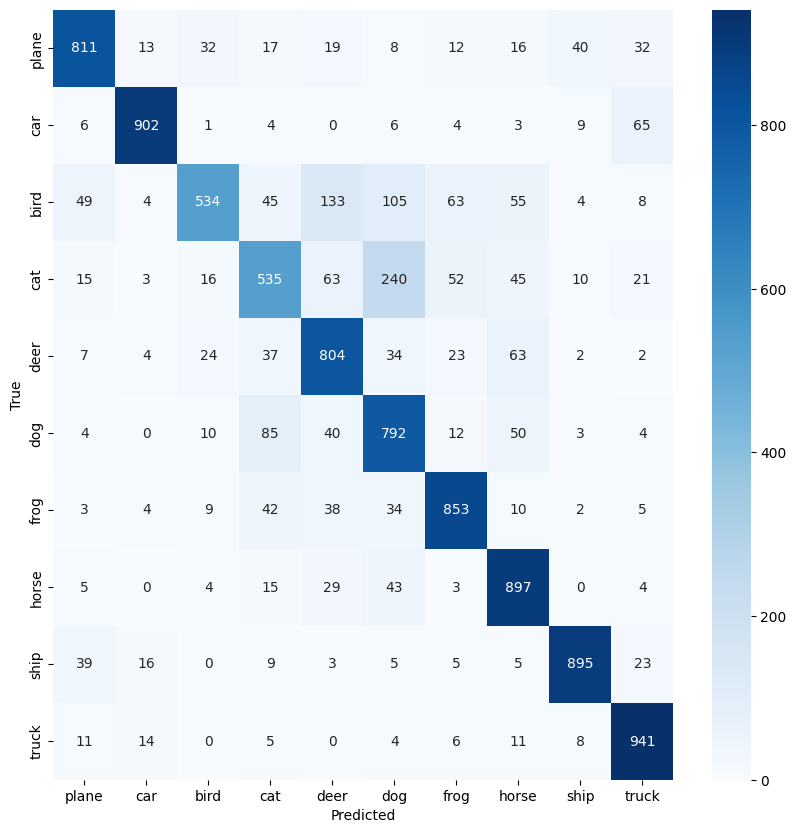

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')

**Confusion matrix analysis**


*   This chart shows that our model struggle to differenciate from cat to dog.
  *    Identify which information our model used to classify
    *    Create image heat map
*   Cata and dog were poor performance



**Grad-CAM to see how the our model works**

**Objective**

This code snippet analyzes the cause of poor classification performance between dogs and cats using the Grad-CAM method. Grad-CAM helps visualize which parts of an image contribute most to the model's decision-making process.






In [ ]:
# Get cat and dog images from testing dataset
cat_idx = np.where(y_test == 3)[0]
dog_idx = np.where(y_test == 5)[0]

# Ensure indices are within the valid range
cat_idx = cat_idx[cat_idx < x_test.shape[0]]  # Filter indices
dog_idx = dog_idx[dog_idx < x_test.shape[0]]  # Filter indices

cat_image = x_test[cat_idx[0]]  # Access the first cat image
dog_image = x_test[dog_idx[0]]  # Access the first dog image

cat_image = np.expand_dims(cat_image, axis=0)
dog_image = np.expand_dims(dog_image, axis=0)

# cat_image and dog_image are already numpy arrays,
# so you don't need to call .numpy() on them
cat_image_np = cat_image.squeeze()  # Remove extra dimensions
dog_image_np = dog_image.squeeze()

# Rescale pixel values to 0-255
cat_image_np = (cat_image_np * 255).astype(np.uint8)
dog_image_np = (dog_image_np * 255).astype(np.uint8)

# Save as PNG files
plt.imsave('cat_image.png', cat_image_np, cmap='gray')
plt.imsave('dog_image.png', dog_image_np, cmap='gray')

This section of the code preprocesses an input image (cat_image.png) to make it suitable for feeding into a machine learning model. The preprocessing steps include reading, resizing, inverting pixel values, normalizing, and reshaping the image.

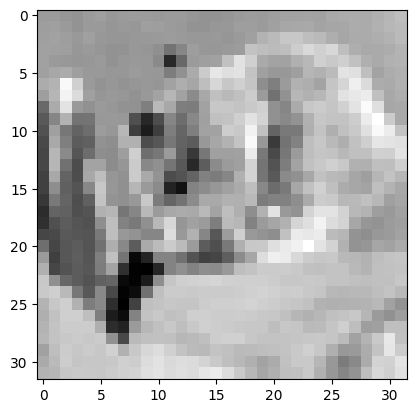

(1, 32, 32, 1)


In [ ]:
import matplotlib.pyplot as plt

image = cv2.imread('/content/cat_image.png', 0)
image = cv2.bitwise_not(image)
image = cv2.resize(image, (32, 32))

# checking how it looks
plt.imshow(image, cmap="gray")
plt.show()

image = tf.expand_dims(image, axis=-1)
image = tf.divide(image, 255)
image = tf.reshape(image, [1, 32, 32, 1])

print(image.shape)



*   Load the base model saved as 'best_model.keras' to see its performance



In [ ]:
model = keras.models.load_model('/content/best_model.keras')



*   See prediction result for an image loaded in the previous codes



In [ ]:
preds = model.predict(image)
i = np.argmax(preds[0])
i

1/1 [==============================] - 0s 91ms/step


3



*   Lable 3 is cat, so this model classified an image correctly



The GradCAM class implements Gradient-weighted Class Activation Mapping, a visualization technique that generates heatmaps highlighting regions in an image that significantly influence the model's classification decisions. This technique helps interpret convolutional neural networks by identifying which parts of an input image are most important for a specific prediction.



In [ ]:
class GradCAM:
      """
    A class for applying the Gradient-weighted Class Activation Mapping (Grad-CAM)
    visualization technique to CNN models.

    Grad-CAM uses the gradients of a target class flowing into the final convolutional
    layer to produce a coarse localization map highlighting important regions in the image
    for predicting the target class.
    """
    def __init__(self, model, classIdx, layerName=None):
          """
    Initialize the GradCAM visualizer.

    Parameters:
    -----------
    model : tensorflow.keras.Model
        The pre-trained model to visualize.
    classIdx : int
        The index of the class for which to generate the Class Activation Map.
    layerName : str, optional
        The name of the final convolutional layer in the network.
        If None, the method will attempt to find it automatically.
    """
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
    """
    Automatically finds the last convolutional layer in the model.

    Returns:
    --------
    str
        The name of the last convolutional layer (with a 4D output shape).

    Raises:
    -------
    ValueError
        If no 4D layer can be found in the model.
    """
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
    """
    Computes the Grad-CAM heatmap for the specified class.

    Parameters:
    -----------
    image : numpy.ndarray
        The input image (expected shape: [1, height, width, channels]).
    eps : float, optional
        Small value added to denominator for numerical stability during normalization.

    Returns:
    --------
    numpy.ndarray
        The generated heatmap as an 8-bit unsigned integer array (range 0-255).

    Algorithm Steps:
    ---------------
    1. Construct a gradient model that outputs both the final convolutional layer and the model predictions
    2. Compute gradients of the target class output with respect to the convolutional feature maps
    3. Apply guided backpropagation to highlight positive influences
    4. Calculate class activation map by weighting feature maps with their gradients
    5. Resize, normalize and convert the heatmap to 8-bit format
    """
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)

            loss = predictions[:, tf.argmax(predictions[0])]
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
"""
    Overlays the generated heatmap on top of the original image.

    Parameters:
    -----------
    heatmap : numpy.ndarray
        The generated heatmap (8-bit, single channel).
    image : numpy.ndarray
        The original image on which to overlay the heatmap.
    alpha : float, optional
        The transparency factor for the original image (0.0-1.0).
    colormap : int, optional
        OpenCV colormap to apply to the heatmap (default: COLORMAP_VIRIDIS).

    Returns:
    --------
    tuple
        A tuple containing (colored_heatmap, overlaid_image).
    """
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [ ]:
# Initialize Grad-CAM visualizer for class index 'i'
# - model: Trained CNN model
# - i: Target class index (3 for cats, 5 for dogs in this dataset)
# - 'last_conv': Name of the final convolutional layer
icam = GradCAM(model, i, 'last_conv')

# Compute heatmap for the preprocessed input image
# Note: 'image' should be a batch of shape [1, H, W, C]
heatmap = icam.compute_heatmap(image)

# Resize heatmap to match original image dimensions
heatmap = cv2.resize(heatmap, (32, 32))

# Load original image from file (without preprocessing)
image = cv2.imread('/content/cat_image.png')
# Resize to model's expected input size (32x32)
image = cv2.resize(image, (32, 32))
print(heatmap.shape, image.shape)

# Overlay heatmap on original image with 50% transparency
(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(32, 32) (32, 32, 3)


This code generates a Grad-CAM heatmap for a given image using a trained model and overlays the heatmap on the original image to visualize regions important for the model's prediction.

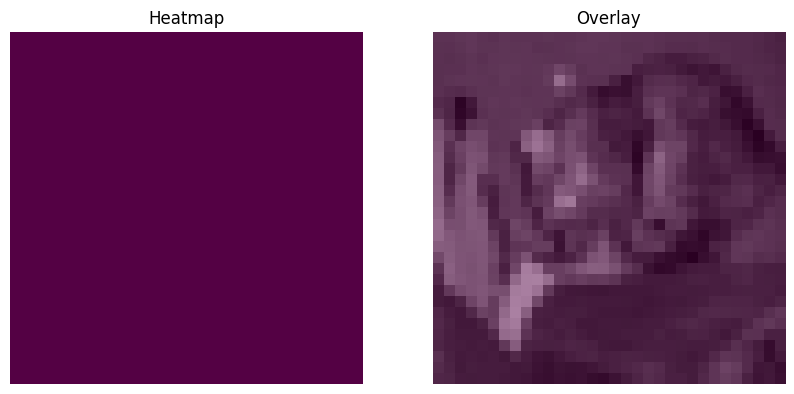

In [ ]:
# Step 1: Load and preprocess the input image
# --------------------------------------------
image = cv2.imread('/content/cat_image.png') # Load the image from file
image = cv2.resize(image, (32, 32)) # Resize to model's expected input size
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR (OpenCV default) to RGB

# Preprocess the image
image = tf.expand_dims(image, axis=0)  # Add batch dimension
image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
image = tf.divide(image, 255)  # Normalize

# Step 2: Instantiate GradCAM and compute heatmap
# -----------------------------------------------
icam = GradCAM(model, i, layerName='last_conv') # Initialize GradCAM with model and target class index (i)

# Compute heatmap
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (32, 32))

# Step 3: Overlay heatmap on original image
# -----------------------------------------
original_image = cv2.imread('/content/cat_image.png')
original_image = cv2.resize(original_image, (32, 32))

# Convert original_image to 3 channels (e.g., BGR) before overlaying
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) #changed to keep 3 channel image

# Overlay the heatmap on the original image with specified transparency (alpha=0.5)
(heatmap, output) = icam.overlay_heatmap(heatmap, original_image, alpha=0.5)

# Step 4: Display results using Matplotlib
# ----------------------------------------
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Heatmap')
plt.imshow(heatmap)
plt.axis('off')

# Display overlaid visualization (heatmap + original image)
plt.subplot(1, 2, 2)
plt.title('Overlay')
plt.imshow(output)
plt.axis('off')
plt.show()

**Analysis of Grad-CAM Results**

The Grad-CAM visualization shown in the image highlights the following observations:

1. Heatmap Analysis
Observation: The heatmap is largely uniform and does not show distinct regions of activation.

Interpretation:

The model may not be focusing on specific features or regions in the image to make its prediction.

This could indicate that the model is relying on global features or background information rather than discriminative features of the object (e.g., dog or cat).

Alternatively, it may suggest that the model has not learned meaningful feature representations for this class.

2. Overlay Analysis
Observation: The overlay combines the original image with the heatmap, but the highlighted regions do not clearly correspond to specific parts of the object (e.g., a dog or a cat).

Interpretation:

The lack of distinct activation areas suggests that the model's decision-making process might be ambiguous or overly generalized.

This could stem from Poor feature extraction in earlier layers of the network.



3. Correct Label Prediction
Observation: Despite no clear activations in the heatmap, the model predicted the correct label for this image.

Interpretation:

The model may still be using useful features that are not visually apparent in the Grad-CAM heatmap.

This discrepancy highlights a limitation of Grad-CAM: it visualizes only spatial contributions from convolutional layers and may not fully capture non-spatial contributions from fully connected layers.

4. Difficulty Differentiating Between Dog and Cat
Observation: The note mentions difficulty in differentiating between dog and cat.

Interpretation:

This suggests that the model is struggling with class-specific features, which is critical for distinguishing similar classes like dogs and cats.

Possible reasons include model architecture not being optimized for fine-grained classification.

**Further Action**

* Examine Model Architecture
Consider using architectures designed for fine-grained classification tasks, such as ResNet or EfficientNet.

Add regularization techniques (e.g., dropout) to prevent overfitting to irrelevant features.

* Debug Feature Extraction Layers
Visualize intermediate feature maps to ensure meaningful features are being extracted in earlier layers.


**Conclusion**

The Grad-CAM results reveal potential issues with feature extraction and class-specific discrimination in the model. While the correct label was predicted, the lack of meaningful activations suggests room for improvement in both dataset quality and model architecture.

# Step 4
## Why Use Color Images Instead of Grayscale?

In previous steps, we trained a CNN using grayscale (black-and-white) images. While grayscale reduces input complexity and speeds up training, it also discards valuable color information that may help differentiate between visually similar classes—especially **animals** like cats, dogs, horses, and deer, which often have similar shapes but distinct textures or fur color.

By using **RGB (color) images**, we provide the model with more expressive input, which helps it:
- Capture subtle differences in texture and shading.
- Distinguish between objects with similar shapes but different colors.
- Improve generalization on challenging classes.

This step aims to re-train and optimize our CNN using **color images (32x32x3)** along with dropout layers and hyperparameter tuning for better performance.

We will:
- Modify the CNN to accept color images.
- Compare the performance with the grayscale model from Step 2.
- Tune learning rate, batch size, and number of epochs for the best validation results.

**Add more layers**

To do step 4-1, we added more layers to improve performance.

* Progressive Filter Increase (32→64→128→256): The model extracts increasingly complex features as it gets deeper:

    * Initial layers (32 filters): Detect basic features like edges and colors

  * Middle layers (64, 128 filters): Identify more complex patterns and shapes

  * Deeper layers (256 filters): Recognize high-level, class-specific feature
  
  * Multiple Convolutional Layers Before Pooling: Stacking 3 convolutional layers before each pooling operation allows the network to learn more complex features without losing spatial information prematurely.

  * Same Padding: Maintains spatial dimensions within each block, preserving feature details.

  * Consistent 3×3 Kernel Size: Small kernels reduce parameter count while maintaining effective receptive field through depth.

* Performance Optimization
  * GlobalAveragePooling2D: Replaces traditional flattening to:

  * Dramatically reduce parameters (preventing overfitting)

  * Enforce structural constraints on learned features

  * Improve model generalization

  * Dropout (0.5): Provides regularization by randomly deactivating 50% of neurons during training, preventing co-adaptation of features.

In [ ]:
# Step 4 - 1
num_classes = 10
input_shape = (32, 32, 3)

model_4_1_2 = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ]
)


In [ ]:
model_4_1_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

**Why this loss function?**

* Multi-class Classification: This loss function is specifically designed for problems with multiple classes (in this case, 10 classes from CIFAR-10).

* Integer-Encoded Labels: SparseCategoricalCrossentropy works with class indices (e.g., 0-9) rather than one-hot encoded vectors, simplifying the data preparation pipeline.

* from_logits=False: This parameter indicates that the model's outputs are already probabilities (passing through the softmax activation in the final Dense layer), not raw logits. This matches the model's design, which uses activation='softmax' in its final layer.


**Why this optimizer?**

* Adaptive Learning: Adam (Adaptive Moment Estimation) automatically adjusts the learning rate for each parameter based on historical gradients, making it suitable for models with many parameters like this CNN.

* Convergence Speed: Adam typically converges faster than standard SGD, helping reduce training time for deep networks.

* Learning Rate 0.001: This is a well-balanced default value that:

  * Is slow enough to avoid overshooting the optimal weights

  * Is fast enough to make reasonable progress during training

  * Works well with Adam's adaptive behavior for this architecture depth


**Why this metric?**

* Direct Interpretability: Accuracy provides an intuitive measure of model performance.

* Balanced Classes: For CIFAR-10, which has balanced classes, accuracy is an appropriate metric.

* Training Feedback: It gives immediate feedback during the training process about how well the model is generalizing.

In [ ]:
model_4_1_2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

**Training Hyperparameters**

* Batch Size (128): This determines how many images are processed before updating the model's weights.

* Why 128? This is a good balance between:

  * Memory efficiency

  * Training stability

  * Computational efficiency


* Epochs (20): Specifies the maximum number of complete passes through the entire training dataset.

* Why 20? This provides sufficient iterations for the model to learn patterns while allowing the early stopping callback to prevent overfitting.

**Callbacks Configuration**

* ModelCheckpoint: Saves model snapshots during training.

  * File Naming: Creates files like "epoch_01.keras", "epoch_02.keras", etc.

  * save_best_only=False: Saves a model at every epoch regardless of performance.

  * save_freq='epoch': Saves once per epoch rather than based on batches.

  * Purpose: Provides model versioning and allows recovery if training is interrupted.

* EarlyStopping: Automatically stops training when improvement ceases.

  * monitor='val_loss': Tracks validation loss to determine when to stop.

  * patience=2: Waits for 2 consecutive epochs without improvement before stopping.

  * Purpose: Prevents overfitting by stopping training when the model begins to memorize rather than generalize.

**Model Training Process**

* fit() Method: The core training function that performs the learning process.

  * Input Data: Provides training features (x_train) and labels (y_train).

  * Validation Split: Uses separate validation data (x_val, y_val) to measure generalization during training.

  * Returns: train_progress contains the complete training history (loss, accuracy, etc. for each epoch).


**Model Evaluation**

* evaluate() Method: Measures model performance on validation data after training completes.

  * verbose=0: Suppresses progress bar during evaluation.

  * Returns: A list where the first element is loss and the second is accuracy.

* Output: Prints the final validation loss and accuracy metrics for quick assessment.

In [ ]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"epoch_{{epoch:02d}}.keras",
        save_best_only=False,
        save_freq='epoch'
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=2),
]

train_progress = model_4_1_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
)

score = model_4_1_2.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


Epoch 1/20


375/375 [==============================] - 147s 380ms/step - loss: 2.3023 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
375/375 [==============================] - 150s 401ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
375/375 [==============================] - 160s 428ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
375/375 [==============================] - 150s 400ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
375/375 [==============================] - 157s 420ms/step - loss: 2.3027 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
375/375 [==============================] - 161s 428ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
375/375 [==============================] - 154s 412ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026

**Step 4-2: Add more layers including dropout**

* Problem addressed: The previous model may have lacked sufficient capacity to learn complex patterns at the intermediate feature level.

  * Solution: Adding an additional convolutional layer in the third block:

  * Increases the depth of feature processing at a critical scale level

  * Expands the effective receptive field without increasing filter size

  * Allows for learning more abstract and complex features before downsampling




In [ ]:
# Step 4-2 Add more dropout layer & train with color images
model_4_2 = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Dropout(0.3),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Dropout(0.3),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ]
)

In [ ]:
model_4_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

In [ ]:
# Applied same complile
model_4_2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
# Applied same callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"model4_2_epoch_{{epoch:02d}}.keras",
        save_best_only=False,
        save_freq='epoch'
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=2),
]

In [ ]:
# Applied same training process
batch_size = 128
epochs = 20


train_progress = model_4_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
)

score = model_4_2.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/20
375/375 [==============================] - 177s 460ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
375/375 [==============================] - 169s 450ms/step - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
375/375 [==============================] - 186s 496ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
375/375 [==============================] - 192s 512ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
375/375 [==============================] - 178s 474ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
375/375 [==============================] - 184s 491ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
375/375 [==============================] - 180s 481ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3026 -

**Summary of step 4-1& 4-2**


*   By adding layers, it did not increase accuracy





*   Original model from step2 worked better, so do hyper parameter tuning based on the original model



In [ ]:
# Set up original model for training
def create_model():
  model = keras.Sequential(
      [
          keras.layers.Input(shape=(32, 32, 3)),
          keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
          keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
          keras.layers.MaxPooling2D(pool_size=(2,2)),
          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
          keras.layers.MaxPooling2D(pool_size=(2,2)),
          keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
          keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
          keras.layers.GlobalAveragePooling2D(),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(num_classes, activation='softmax')
      ]
  )
  return model

  callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"model{{epoch:02d}}.keras",
        save_best_only=True
    ),
]

In [ ]:
# Hyper parameter tuning
# Check if the number of epoch, learning rate, and batch size is the most efficient
batch_size_test = [16, 32, 64, 128]
epochs_test = [10, 20, 30, 50, 80]
learning_rate_test = [0.0005, 0.001, 0.005]


for batch_size in batch_size_test:
  for epochs in epochs_test:
    for learning_rate in learning_rate_test:
      model_4_2 = create_model()
      print(f"Batch size: {batch_size}, Epochs: {epochs}, Learning Rate: {learning_rate}")
      model_4_2.compile(
          loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
          optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
          metrics=['accuracy']
      )
      train_progress = model_4_2.fit(
          x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=callbacks,
      )
      score = model_4_2.evaluate(x_val, y_val, verbose=0)
      print('Validation loss:', score[0])
      print('Validation accuracy:', score[1])
      print()

(Result was lost due to an error, so we attach results from backup stored in our github repository)
[Our Github repository](https://github.com/itoshiyanazawa/cnn_project/blob/main/main.ipynb)

```
Batch size: 16, Epochs: 10, Learning Rate: 0.0005
Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.2979 - loss: 1.8673 - val_accuracy: 0.5328 - val_loss: 1.2853
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.5386 - loss: 1.2855 - val_accuracy: 0.6262 - val_loss: 1.0366
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6368 - loss: 1.0460 - val_accuracy: 0.6812 - val_loss: 0.9035
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6919 - loss: 0.9016 - val_accuracy: 0.7031 - val_loss: 0.8610
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7253 - loss: 0.7962 - val_accuracy: 0.7358 - val_loss: 0.7759
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7527 - loss: 0.7169 - val_accuracy: 0.7399 - val_loss: 0.7765
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7735 - loss: 0.6535 - val_accuracy: 0.7356 - val_loss: 0.7971
Validation loss: 0.7970728278160095
Validation accuracy: 0.7355833053588867

Batch size: 16, Epochs: 10, Learning Rate: 0.001
Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.2729 - loss: 1.9330 - val_accuracy: 0.5133 - val_loss: 1.3306
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5231 - loss: 1.3369 - val_accuracy: 0.5991 - val_loss: 1.1301
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.5951 - loss: 1.1450 - val_accuracy: 0.6298 - val_loss: 1.0371
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.6477 - loss: 1.0122 - val_accuracy: 0.6563 - val_loss: 0.9897
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6796 - loss: 0.9290 - val_accuracy: 0.6819 - val_loss: 0.9516
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7064 - loss: 0.8539 - val_accuracy: 0.6892 - val_loss: 0.9289
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7216 - loss: 0.7988 - val_accuracy: 0.7012 - val_loss: 0.8917
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7366 - loss: 0.7578 - val_accuracy: 0.6971 - val_loss: 0.9161
Epoch 9/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7469 - loss: 0.7236 - val_accuracy: 0.7149 - val_loss: 0.8827
Epoch 10/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7637 - loss: 0.6683 - val_accuracy: 0.7092 - val_loss: 0.9112
Validation loss: 0.9112168550491333
Validation accuracy: 0.7091666460037231

Batch size: 16, Epochs: 10, Learning Rate: 0.005
Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.1002 - loss: 2.3053 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Validation loss: 2.304293394088745
Validation accuracy: 0.10000000149011612

Batch size: 16, Epochs: 20, Learning Rate: 0.0005
Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.2996 - loss: 1.8741 - val_accuracy: 0.5192 - val_loss: 1.3186
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5315 - loss: 1.3099 - val_accuracy: 0.6062 - val_loss: 1.1093
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6137 - loss: 1.0937 - val_accuracy: 0.6729 - val_loss: 0.9250
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6719 - loss: 0.9399 - val_accuracy: 0.6923 - val_loss: 0.8866
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7087 - loss: 0.8340 - val_accuracy: 0.6758 - val_loss: 0.9422
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7410 - loss: 0.7483 - val_accuracy: 0.7254 - val_loss: 0.8049
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7617 - loss: 0.6837 - val_accuracy: 0.7447 - val_loss: 0.7519
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7806 - loss: 0.6311 - val_accuracy: 0.7411 - val_loss: 0.7658
Epoch 9/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7971 - loss: 0.5729 - val_accuracy: 0.7319 - val_loss: 0.8444
Validation loss: 0.8444178104400635
Validation accuracy: 0.7319166660308838

Batch size: 16, Epochs: 20, Learning Rate: 0.001
Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.2532 - loss: 1.9688 - val_accuracy: 0.5233 - val_loss: 1.3087
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.5243 - loss: 1.3350 - val_accuracy: 0.6115 - val_loss: 1.0670
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6085 - loss: 1.1164 - val_accuracy: 0.6451 - val_loss: 0.9983
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6578 - loss: 0.9846 - val_accuracy: 0.6757 - val_loss: 0.9452
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6875 - loss: 0.9006 - val_accuracy: 0.6989 - val_loss: 0.8729
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7148 - loss: 0.8283 - val_accuracy: 0.7015 - val_loss: 0.8836
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7350 - loss: 0.7715 - val_accuracy: 0.7092 - val_loss: 0.8810
Validation loss: 0.8810237646102905
Validation accuracy: 0.7092499732971191

Batch size: 16, Epochs: 20, Learning Rate: 0.005
Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.1004 - loss: 2.3046 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Validation loss: 2.304293394088745
Validation accuracy: 0.10000000149011612

Batch size: 16, Epochs: 30, Learning Rate: 0.0005
Epoch 1/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.2703 - loss: 1.9368 - val_accuracy: 0.5303 - val_loss: 1.2848
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5427 - loss: 1.2844 - val_accuracy: 0.6302 - val_loss: 1.0270
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6328 - loss: 1.0500 - val_accuracy: 0.6864 - val_loss: 0.8939
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6902 - loss: 0.9022 - val_accuracy: 0.7073 - val_loss: 0.8429
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7273 - loss: 0.7981 - val_accuracy: 0.7172 - val_loss: 0.8158
Epoch 6/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7499 - loss: 0.7158 - val_accuracy: 0.7345 - val_loss: 0.7675
Epoch 7/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7731 - loss: 0.6546 - val_accuracy: 0.7505 - val_loss: 0.7484
Epoch 8/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7934 - loss: 0.5941 - val_accuracy: 0.7538 - val_loss: 0.7525
Epoch 9/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8098 - loss: 0.5452 - val_accuracy: 0.7558 - val_loss: 0.7691
Validation loss: 0.7691310048103333
Validation accuracy: 0.7557500004768372

Batch size: 16, Epochs: 30, Learning Rate: 0.001
Epoch 1/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.2525 - loss: 1.9690 - val_accuracy: 0.5057 - val_loss: 1.3664
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.5084 - loss: 1.3648 - val_accuracy: 0.5828 - val_loss: 1.1641
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.5878 - loss: 1.1707 - val_accuracy: 0.6274 - val_loss: 1.0604
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6354 - loss: 1.0484 - val_accuracy: 0.6483 - val_loss: 1.0342
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6601 - loss: 0.9699 - val_accuracy: 0.6628 - val_loss: 0.9965
Epoch 6/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6901 - loss: 0.8884 - val_accuracy: 0.6772 - val_loss: 0.9603
Epoch 7/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7110 - loss: 0.8373 - val_accuracy: 0.6962 - val_loss: 0.9114
Epoch 8/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7284 - loss: 0.7886 - val_accuracy: 0.6906 - val_loss: 0.9442
Epoch 9/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7413 - loss: 0.7486 - val_accuracy: 0.7084 - val_loss: 0.9113
Epoch 10/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7509 - loss: 0.7135 - val_accuracy: 0.7066 - val_loss: 0.9389
Epoch 11/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7622 - loss: 0.6784 - val_accuracy: 0.7036 - val_loss: 0.9766
Validation loss: 0.9765865802764893
Validation accuracy: 0.7035833597183228

Batch size: 16, Epochs: 30, Learning Rate: 0.005
Epoch 1/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.0985 - loss: 2.3044 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Validation loss: 2.304293394088745
Validation accuracy: 0.10000000149011612

Batch size: 16, Epochs: 50, Learning Rate: 0.0005
Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.2788 - loss: 1.9119 - val_accuracy: 0.5183 - val_loss: 1.3279
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5394 - loss: 1.2932 - val_accuracy: 0.6261 - val_loss: 1.0450
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6263 - loss: 1.0603 - val_accuracy: 0.6607 - val_loss: 0.9546
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6786 - loss: 0.9309 - val_accuracy: 0.6883 - val_loss: 0.8821
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7141 - loss: 0.8177 - val_accuracy: 0.7036 - val_loss: 0.8614
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7459 - loss: 0.7353 - val_accuracy: 0.7307 - val_loss: 0.7903
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7661 - loss: 0.6622 - val_accuracy: 0.7437 - val_loss: 0.7637
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7881 - loss: 0.6148 - val_accuracy: 0.7465 - val_loss: 0.7623
Epoch 9/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8033 - loss: 0.5590 - val_accuracy: 0.7541 - val_loss: 0.7817
Epoch 10/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8213 - loss: 0.5113 - val_accuracy: 0.7459 - val_loss: 0.8125
Validation loss: 0.8125385046005249
Validation accuracy: 0.7459166646003723

Batch size: 16, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.2717 - loss: 1.9247 - val_accuracy: 0.5199 - val_loss: 1.3192
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5211 - loss: 1.3426 - val_accuracy: 0.5785 - val_loss: 1.1655
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5906 - loss: 1.1541 - val_accuracy: 0.6253 - val_loss: 1.0637
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6339 - loss: 1.0565 - val_accuracy: 0.6547 - val_loss: 0.9870
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6620 - loss: 0.9604 - val_accuracy: 0.6645 - val_loss: 0.9937
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6873 - loss: 0.8916 - val_accuracy: 0.6875 - val_loss: 0.9386
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7106 - loss: 0.8333 - val_accuracy: 0.6760 - val_loss: 0.9648
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7242 - loss: 0.7891 - val_accuracy: 0.6998 - val_loss: 0.9160
Epoch 9/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7388 - loss: 0.7418 - val_accuracy: 0.6982 - val_loss: 0.9311
Epoch 10/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7511 - loss: 0.7097 - val_accuracy: 0.7025 - val_loss: 0.9431
Validation loss: 0.9430872201919556
Validation accuracy: 0.7024999856948853

Batch size: 16, Epochs: 50, Learning Rate: 0.005
Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.0999 - loss: 2.3044 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Validation loss: 2.304293394088745
Validation accuracy: 0.10000000149011612

Batch size: 16, Epochs: 80, Learning Rate: 0.0005
Epoch 1/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.3026 - loss: 1.8537 - val_accuracy: 0.5433 - val_loss: 1.2602
Epoch 2/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5416 - loss: 1.2805 - val_accuracy: 0.6143 - val_loss: 1.0789
Epoch 3/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6265 - loss: 1.0682 - val_accuracy: 0.6768 - val_loss: 0.9109
Epoch 4/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6780 - loss: 0.9308 - val_accuracy: 0.7004 - val_loss: 0.8435
Epoch 5/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7177 - loss: 0.8239 - val_accuracy: 0.7117 - val_loss: 0.8221
Epoch 6/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7460 - loss: 0.7390 - val_accuracy: 0.7307 - val_loss: 0.7958
Epoch 7/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7702 - loss: 0.6697 - val_accuracy: 0.7462 - val_loss: 0.7583
Epoch 8/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7873 - loss: 0.6172 - val_accuracy: 0.7488 - val_loss: 0.7670
Epoch 9/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8036 - loss: 0.5636 - val_accuracy: 0.7576 - val_loss: 0.7839
Validation loss: 0.7838735580444336
Validation accuracy: 0.7575833201408386

Batch size: 16, Epochs: 80, Learning Rate: 0.001
Epoch 1/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.2592 - loss: 1.9450 - val_accuracy: 0.4817 - val_loss: 1.4129
Epoch 2/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.5110 - loss: 1.3746 - val_accuracy: 0.5822 - val_loss: 1.1661
Epoch 3/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.5838 - loss: 1.1795 - val_accuracy: 0.6253 - val_loss: 1.0597
Epoch 4/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6362 - loss: 1.0468 - val_accuracy: 0.6327 - val_loss: 1.0574
Epoch 5/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6668 - loss: 0.9564 - val_accuracy: 0.6495 - val_loss: 1.0190
Epoch 6/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6893 - loss: 0.8918 - val_accuracy: 0.6404 - val_loss: 1.0855
Epoch 7/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7099 - loss: 0.8290 - val_accuracy: 0.6808 - val_loss: 0.9541
Epoch 8/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7280 - loss: 0.7852 - val_accuracy: 0.6963 - val_loss: 0.9235
Epoch 9/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7406 - loss: 0.7388 - val_accuracy: 0.7022 - val_loss: 0.9414
Epoch 10/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7541 - loss: 0.7066 - val_accuracy: 0.6948 - val_loss: 0.9700
Validation loss: 0.9699922800064087
Validation accuracy: 0.6948333382606506

Batch size: 16, Epochs: 80, Learning Rate: 0.005
Epoch 1/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.0995 - loss: 2.3044 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 2/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 3/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 4/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Epoch 5/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.0991 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3043
Validation loss: 2.304293394088745
Validation accuracy: 0.10000000149011612

Batch size: 32, Epochs: 10, Learning Rate: 0.0005
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2696 - loss: 1.9498 - val_accuracy: 0.5013 - val_loss: 1.3618
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.5030 - loss: 1.3912 - val_accuracy: 0.5800 - val_loss: 1.1602
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5827 - loss: 1.1916 - val_accuracy: 0.6349 - val_loss: 1.0268
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6356 - loss: 1.0450 - val_accuracy: 0.6745 - val_loss: 0.9340
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6735 - loss: 0.9377 - val_accuracy: 0.6966 - val_loss: 0.8766
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7086 - loss: 0.8525 - val_accuracy: 0.7082 - val_loss: 0.8462
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7320 - loss: 0.7818 - val_accuracy: 0.7200 - val_loss: 0.8229
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7504 - loss: 0.7213 - val_accuracy: 0.7343 - val_loss: 0.7809
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7701 - loss: 0.6659 - val_accuracy: 0.7382 - val_loss: 0.7787
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7873 - loss: 0.6143 - val_accuracy: 0.7282 - val_loss: 0.8459
Validation loss: 0.8458666801452637
Validation accuracy: 0.7281666398048401

Batch size: 32, Epochs: 10, Learning Rate: 0.001
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2659 - loss: 1.9433 - val_accuracy: 0.4647 - val_loss: 1.4411
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.5175 - loss: 1.3463 - val_accuracy: 0.5754 - val_loss: 1.2037
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5898 - loss: 1.1574 - val_accuracy: 0.6108 - val_loss: 1.0769
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6412 - loss: 1.0265 - val_accuracy: 0.6762 - val_loss: 0.9434
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6757 - loss: 0.9285 - val_accuracy: 0.6883 - val_loss: 0.9061
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7079 - loss: 0.8478 - val_accuracy: 0.7013 - val_loss: 0.8930
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7282 - loss: 0.7874 - val_accuracy: 0.7121 - val_loss: 0.8880
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7454 - loss: 0.7295 - val_accuracy: 0.7019 - val_loss: 0.9189
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7627 - loss: 0.6805 - val_accuracy: 0.6990 - val_loss: 0.9584
Validation loss: 0.9584140777587891
Validation accuracy: 0.6990000009536743

Batch size: 32, Epochs: 10, Learning Rate: 0.005
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0992 - loss: 2.3132 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0993 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Validation loss: 2.303723096847534
Validation accuracy: 0.10000000149011612

Batch size: 32, Epochs: 20, Learning Rate: 0.0005
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2886 - loss: 1.8944 - val_accuracy: 0.4932 - val_loss: 1.3951
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5119 - loss: 1.3580 - val_accuracy: 0.5946 - val_loss: 1.1300
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5949 - loss: 1.1523 - val_accuracy: 0.6399 - val_loss: 1.0024
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6460 - loss: 1.0119 - val_accuracy: 0.6793 - val_loss: 0.8994
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6835 - loss: 0.9102 - val_accuracy: 0.7059 - val_loss: 0.8192
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7187 - loss: 0.8151 - val_accuracy: 0.7113 - val_loss: 0.8355
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7437 - loss: 0.7481 - val_accuracy: 0.7357 - val_loss: 0.7636
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7661 - loss: 0.6813 - val_accuracy: 0.7282 - val_loss: 0.7923
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7821 - loss: 0.6248 - val_accuracy: 0.7473 - val_loss: 0.7467
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7978 - loss: 0.5781 - val_accuracy: 0.7483 - val_loss: 0.7529
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8139 - loss: 0.5287 - val_accuracy: 0.7458 - val_loss: 0.7840
Validation loss: 0.7840117812156677
Validation accuracy: 0.7458333373069763

Batch size: 32, Epochs: 20, Learning Rate: 0.001
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2729 - loss: 1.9237 - val_accuracy: 0.5117 - val_loss: 1.3292
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5257 - loss: 1.3269 - val_accuracy: 0.5965 - val_loss: 1.1344
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6074 - loss: 1.1142 - val_accuracy: 0.6552 - val_loss: 0.9700
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6563 - loss: 0.9887 - val_accuracy: 0.6895 - val_loss: 0.8911
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6986 - loss: 0.8767 - val_accuracy: 0.7021 - val_loss: 0.8573
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7249 - loss: 0.7972 - val_accuracy: 0.7102 - val_loss: 0.8461
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7445 - loss: 0.7340 - val_accuracy: 0.7242 - val_loss: 0.8071
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7641 - loss: 0.6783 - val_accuracy: 0.7312 - val_loss: 0.8070
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7790 - loss: 0.6267 - val_accuracy: 0.7259 - val_loss: 0.8397
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7931 - loss: 0.5978 - val_accuracy: 0.7316 - val_loss: 0.8346
Validation loss: 0.8346132636070251
Validation accuracy: 0.7315833568572998

Batch size: 32, Epochs: 20, Learning Rate: 0.005
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0974 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Validation loss: 2.303723096847534
Validation accuracy: 0.10000000149011612

Batch size: 32, Epochs: 30, Learning Rate: 0.0005
Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2774 - loss: 1.9262 - val_accuracy: 0.4982 - val_loss: 1.3584
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5129 - loss: 1.3596 - val_accuracy: 0.5783 - val_loss: 1.1667
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5909 - loss: 1.1551 - val_accuracy: 0.6398 - val_loss: 1.0131
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6458 - loss: 1.0116 - val_accuracy: 0.6883 - val_loss: 0.8800
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6851 - loss: 0.9032 - val_accuracy: 0.7104 - val_loss: 0.8113
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7171 - loss: 0.8088 - val_accuracy: 0.7237 - val_loss: 0.7870
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7449 - loss: 0.7430 - val_accuracy: 0.7299 - val_loss: 0.7718
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7625 - loss: 0.6888 - val_accuracy: 0.7379 - val_loss: 0.7604
Epoch 9/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7790 - loss: 0.6399 - val_accuracy: 0.7436 - val_loss: 0.7677
Epoch 10/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7939 - loss: 0.5924 - val_accuracy: 0.7498 - val_loss: 0.7604
Epoch 11/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8090 - loss: 0.5434 - val_accuracy: 0.7446 - val_loss: 0.7838
Epoch 12/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8215 - loss: 0.5068 - val_accuracy: 0.7433 - val_loss: 0.8243
Validation loss: 0.8243014216423035
Validation accuracy: 0.7432500123977661

Batch size: 32, Epochs: 30, Learning Rate: 0.001
Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2753 - loss: 1.9195 - val_accuracy: 0.5132 - val_loss: 1.3217
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5176 - loss: 1.3424 - val_accuracy: 0.5667 - val_loss: 1.2016
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5959 - loss: 1.1348 - val_accuracy: 0.6243 - val_loss: 1.0345
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6516 - loss: 0.9908 - val_accuracy: 0.6778 - val_loss: 0.9123
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6913 - loss: 0.8893 - val_accuracy: 0.7076 - val_loss: 0.8527
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7213 - loss: 0.8055 - val_accuracy: 0.7087 - val_loss: 0.8556
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7426 - loss: 0.7399 - val_accuracy: 0.7194 - val_loss: 0.8409
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7592 - loss: 0.6899 - val_accuracy: 0.7184 - val_loss: 0.8439
Epoch 9/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7770 - loss: 0.6461 - val_accuracy: 0.7235 - val_loss: 0.8728
Validation loss: 0.87276291847229
Validation accuracy: 0.7235000133514404

Batch size: 32, Epochs: 30, Learning Rate: 0.005
Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1009 - loss: 2.3069 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Validation loss: 2.303723096847534
Validation accuracy: 0.10000000149011612

Batch size: 32, Epochs: 50, Learning Rate: 0.0005
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2684 - loss: 1.9418 - val_accuracy: 0.4902 - val_loss: 1.3958
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5155 - loss: 1.3538 - val_accuracy: 0.6034 - val_loss: 1.1012
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5991 - loss: 1.1405 - val_accuracy: 0.6490 - val_loss: 0.9861
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6509 - loss: 1.0072 - val_accuracy: 0.6755 - val_loss: 0.9189
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6908 - loss: 0.8969 - val_accuracy: 0.6942 - val_loss: 0.8771
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7203 - loss: 0.8116 - val_accuracy: 0.7109 - val_loss: 0.8466
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7432 - loss: 0.7500 - val_accuracy: 0.7302 - val_loss: 0.7826
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7636 - loss: 0.6871 - val_accuracy: 0.7177 - val_loss: 0.8262
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7826 - loss: 0.6254 - val_accuracy: 0.7237 - val_loss: 0.8221
Validation loss: 0.8220617771148682
Validation accuracy: 0.7237499952316284

Batch size: 32, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2701 - loss: 1.9295 - val_accuracy: 0.5161 - val_loss: 1.3268
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5172 - loss: 1.3395 - val_accuracy: 0.6048 - val_loss: 1.0965
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6029 - loss: 1.1278 - val_accuracy: 0.6649 - val_loss: 0.9393
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6564 - loss: 0.9843 - val_accuracy: 0.6837 - val_loss: 0.9128
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6959 - loss: 0.8850 - val_accuracy: 0.6913 - val_loss: 0.9011
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7235 - loss: 0.8019 - val_accuracy: 0.7175 - val_loss: 0.8284
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7397 - loss: 0.7432 - val_accuracy: 0.7233 - val_loss: 0.8223
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7604 - loss: 0.6956 - val_accuracy: 0.7184 - val_loss: 0.8894
Epoch 9/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7772 - loss: 0.6447 - val_accuracy: 0.7269 - val_loss: 0.8593
Validation loss: 0.8593276143074036
Validation accuracy: 0.7269166707992554

Batch size: 32, Epochs: 50, Learning Rate: 0.005
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0980 - loss: 2.3073 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0993 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Validation loss: 2.303723096847534
Validation accuracy: 0.10000000149011612

Batch size: 32, Epochs: 80, Learning Rate: 0.0005
Epoch 1/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2810 - loss: 1.9148 - val_accuracy: 0.5123 - val_loss: 1.3346
Epoch 2/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5088 - loss: 1.3648 - val_accuracy: 0.5841 - val_loss: 1.1405
Epoch 3/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5930 - loss: 1.1639 - val_accuracy: 0.6363 - val_loss: 1.0091
Epoch 4/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6462 - loss: 1.0151 - val_accuracy: 0.6825 - val_loss: 0.8971
Epoch 5/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6873 - loss: 0.9069 - val_accuracy: 0.7078 - val_loss: 0.8266
Epoch 6/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7167 - loss: 0.8224 - val_accuracy: 0.7147 - val_loss: 0.8188
Epoch 7/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7413 - loss: 0.7619 - val_accuracy: 0.7310 - val_loss: 0.7765
Epoch 8/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7573 - loss: 0.7068 - val_accuracy: 0.7308 - val_loss: 0.7943
Epoch 9/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7751 - loss: 0.6535 - val_accuracy: 0.7418 - val_loss: 0.7656
Epoch 10/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7929 - loss: 0.6019 - val_accuracy: 0.7434 - val_loss: 0.7807
Epoch 11/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8059 - loss: 0.5619 - val_accuracy: 0.7571 - val_loss: 0.7466
Epoch 12/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8185 - loss: 0.5303 - val_accuracy: 0.7566 - val_loss: 0.7691
Epoch 13/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8270 - loss: 0.4908 - val_accuracy: 0.7514 - val_loss: 0.8021
Validation loss: 0.8020991086959839
Validation accuracy: 0.7514166831970215

Batch size: 32, Epochs: 80, Learning Rate: 0.001
Epoch 1/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2767 - loss: 1.9224 - val_accuracy: 0.5166 - val_loss: 1.3312
Epoch 2/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5295 - loss: 1.3289 - val_accuracy: 0.5834 - val_loss: 1.1731
Epoch 3/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6059 - loss: 1.1202 - val_accuracy: 0.6538 - val_loss: 0.9783
Epoch 4/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6563 - loss: 0.9916 - val_accuracy: 0.6779 - val_loss: 0.9313
Epoch 5/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6945 - loss: 0.8839 - val_accuracy: 0.7032 - val_loss: 0.8759
Epoch 6/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7251 - loss: 0.8042 - val_accuracy: 0.7023 - val_loss: 0.8817
Epoch 7/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7417 - loss: 0.7472 - val_accuracy: 0.7235 - val_loss: 0.8319
Epoch 8/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7614 - loss: 0.6941 - val_accuracy: 0.7129 - val_loss: 0.8829
Epoch 9/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7762 - loss: 0.6493 - val_accuracy: 0.7156 - val_loss: 0.8892
Validation loss: 0.8892136216163635
Validation accuracy: 0.715583324432373

Batch size: 32, Epochs: 80, Learning Rate: 0.005
Epoch 1/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0997 - loss: 2.3038 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 2/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 3/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 4/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 5/80
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0994 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3037
Validation loss: 2.303723096847534
Validation accuracy: 0.10000000149011612

Batch size: 64, Epochs: 10, Learning Rate: 0.0005
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2653 - loss: 1.9577 - val_accuracy: 0.4998 - val_loss: 1.3663
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4902 - loss: 1.4137 - val_accuracy: 0.5702 - val_loss: 1.1912
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5649 - loss: 1.2268 - val_accuracy: 0.6154 - val_loss: 1.0776
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6147 - loss: 1.0941 - val_accuracy: 0.6579 - val_loss: 0.9633
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6588 - loss: 0.9840 - val_accuracy: 0.6725 - val_loss: 0.9247
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6905 - loss: 0.8938 - val_accuracy: 0.7021 - val_loss: 0.8395
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7153 - loss: 0.8232 - val_accuracy: 0.7147 - val_loss: 0.8092
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7342 - loss: 0.7677 - val_accuracy: 0.7267 - val_loss: 0.7813
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7523 - loss: 0.7157 - val_accuracy: 0.7234 - val_loss: 0.8040
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7654 - loss: 0.6769 - val_accuracy: 0.7452 - val_loss: 0.7577
Validation loss: 0.7576590776443481
Validation accuracy: 0.7451666593551636

Batch size: 64, Epochs: 10, Learning Rate: 0.001
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2639 - loss: 1.9398 - val_accuracy: 0.5297 - val_loss: 1.2892
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5258 - loss: 1.3222 - val_accuracy: 0.6137 - val_loss: 1.0805
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6032 - loss: 1.1209 - val_accuracy: 0.6495 - val_loss: 0.9854
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6492 - loss: 0.9942 - val_accuracy: 0.6802 - val_loss: 0.9116
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6845 - loss: 0.9069 - val_accuracy: 0.6969 - val_loss: 0.8712
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7164 - loss: 0.8158 - val_accuracy: 0.7147 - val_loss: 0.8195
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7372 - loss: 0.7577 - val_accuracy: 0.7293 - val_loss: 0.7837
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7544 - loss: 0.7044 - val_accuracy: 0.7368 - val_loss: 0.7825
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7743 - loss: 0.6492 - val_accuracy: 0.7372 - val_loss: 0.7723
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7833 - loss: 0.6245 - val_accuracy: 0.7328 - val_loss: 0.7936
Validation loss: 0.7936146855354309
Validation accuracy: 0.7328333258628845

Batch size: 64, Epochs: 10, Learning Rate: 0.005
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2253 - loss: 2.0390 - val_accuracy: 0.3943 - val_loss: 1.6518
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3961 - loss: 1.6532 - val_accuracy: 0.4359 - val_loss: 1.5326
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4424 - loss: 1.5312 - val_accuracy: 0.4776 - val_loss: 1.4343
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4640 - loss: 1.4802 - val_accuracy: 0.4870 - val_loss: 1.4086
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4738 - loss: 1.4571 - val_accuracy: 0.5084 - val_loss: 1.3595
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4831 - loss: 1.4338 - val_accuracy: 0.5054 - val_loss: 1.3676
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4882 - loss: 1.4250 - val_accuracy: 0.5163 - val_loss: 1.3617
Validation loss: 1.3616880178451538
Validation accuracy: 0.5163333415985107

Batch size: 64, Epochs: 20, Learning Rate: 0.0005
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2498 - loss: 1.9999 - val_accuracy: 0.4873 - val_loss: 1.3979
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4812 - loss: 1.4371 - val_accuracy: 0.5727 - val_loss: 1.1959
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5653 - loss: 1.2314 - val_accuracy: 0.6188 - val_loss: 1.0694
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6132 - loss: 1.1008 - val_accuracy: 0.6443 - val_loss: 1.0006
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6448 - loss: 1.0097 - val_accuracy: 0.6751 - val_loss: 0.9314
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6814 - loss: 0.9225 - val_accuracy: 0.6944 - val_loss: 0.8818
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7017 - loss: 0.8548 - val_accuracy: 0.6891 - val_loss: 0.8902
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7244 - loss: 0.7910 - val_accuracy: 0.7168 - val_loss: 0.8120
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7423 - loss: 0.7420 - val_accuracy: 0.7117 - val_loss: 0.8522
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7576 - loss: 0.6942 - val_accuracy: 0.7185 - val_loss: 0.8432
Validation loss: 0.8432484269142151
Validation accuracy: 0.718500018119812

Batch size: 64, Epochs: 20, Learning Rate: 0.001
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2598 - loss: 1.9635 - val_accuracy: 0.5090 - val_loss: 1.3246
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5067 - loss: 1.3700 - val_accuracy: 0.5981 - val_loss: 1.1114
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5850 - loss: 1.1687 - val_accuracy: 0.6550 - val_loss: 0.9703
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6397 - loss: 1.0224 - val_accuracy: 0.6791 - val_loss: 0.8942
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6816 - loss: 0.9084 - val_accuracy: 0.6902 - val_loss: 0.8739
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7152 - loss: 0.8191 - val_accuracy: 0.7161 - val_loss: 0.8100
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7402 - loss: 0.7515 - val_accuracy: 0.7239 - val_loss: 0.7990
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7626 - loss: 0.6887 - val_accuracy: 0.7326 - val_loss: 0.7723
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7756 - loss: 0.6567 - val_accuracy: 0.7424 - val_loss: 0.7764
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7883 - loss: 0.6082 - val_accuracy: 0.7408 - val_loss: 0.7828
Validation loss: 0.7827686071395874
Validation accuracy: 0.7408333420753479

Batch size: 64, Epochs: 20, Learning Rate: 0.005
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0987 - loss: 2.3046 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1003 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0994 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3032
Validation loss: 2.303250551223755
Validation accuracy: 0.10000000149011612

Batch size: 64, Epochs: 30, Learning Rate: 0.0005
Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2656 - loss: 1.9505 - val_accuracy: 0.4814 - val_loss: 1.4199
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4848 - loss: 1.4221 - val_accuracy: 0.5695 - val_loss: 1.1871
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5665 - loss: 1.2282 - val_accuracy: 0.6129 - val_loss: 1.0720
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6123 - loss: 1.0985 - val_accuracy: 0.6442 - val_loss: 0.9914
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6516 - loss: 0.9944 - val_accuracy: 0.6783 - val_loss: 0.9008
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6828 - loss: 0.9090 - val_accuracy: 0.6998 - val_loss: 0.8535
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7065 - loss: 0.8480 - val_accuracy: 0.7205 - val_loss: 0.8024
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7318 - loss: 0.7764 - val_accuracy: 0.7331 - val_loss: 0.7757
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7493 - loss: 0.7257 - val_accuracy: 0.7406 - val_loss: 0.7466
Epoch 10/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7665 - loss: 0.6807 - val_accuracy: 0.7443 - val_loss: 0.7430
Epoch 11/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7827 - loss: 0.6326 - val_accuracy: 0.7371 - val_loss: 0.7740
Epoch 12/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7937 - loss: 0.5971 - val_accuracy: 0.7418 - val_loss: 0.7526
Validation loss: 0.7525802254676819
Validation accuracy: 0.7418333292007446

Batch size: 64, Epochs: 30, Learning Rate: 0.001
Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2500 - loss: 1.9844 - val_accuracy: 0.4863 - val_loss: 1.3852
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4953 - loss: 1.4067 - val_accuracy: 0.5914 - val_loss: 1.1352
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5842 - loss: 1.1873 - val_accuracy: 0.6348 - val_loss: 1.0133
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6355 - loss: 1.0479 - val_accuracy: 0.6636 - val_loss: 0.9399
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6736 - loss: 0.9430 - val_accuracy: 0.6921 - val_loss: 0.8675
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7042 - loss: 0.8580 - val_accuracy: 0.7032 - val_loss: 0.8509
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7261 - loss: 0.8013 - val_accuracy: 0.7082 - val_loss: 0.8369
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7413 - loss: 0.7482 - val_accuracy: 0.7282 - val_loss: 0.8041
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7554 - loss: 0.7044 - val_accuracy: 0.7278 - val_loss: 0.8036
Epoch 10/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7722 - loss: 0.6609 - val_accuracy: 0.7368 - val_loss: 0.7764
Epoch 11/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7833 - loss: 0.6174 - val_accuracy: 0.7417 - val_loss: 0.7787
Epoch 12/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7981 - loss: 0.5796 - val_accuracy: 0.7392 - val_loss: 0.8199
Validation loss: 0.8199122548103333
Validation accuracy: 0.7391666769981384

Batch size: 64, Epochs: 30, Learning Rate: 0.005
Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1005 - loss: 2.3073 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0995 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3033
Validation loss: 2.3032500743865967
Validation accuracy: 0.10000000149011612

Batch size: 64, Epochs: 50, Learning Rate: 0.0005
Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2710 - loss: 1.9440 - val_accuracy: 0.4967 - val_loss: 1.3767
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4927 - loss: 1.4054 - val_accuracy: 0.5723 - val_loss: 1.1829
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5650 - loss: 1.2241 - val_accuracy: 0.6028 - val_loss: 1.0961
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6133 - loss: 1.1000 - val_accuracy: 0.6480 - val_loss: 0.9853
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6528 - loss: 0.9908 - val_accuracy: 0.6805 - val_loss: 0.9031
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6768 - loss: 0.9200 - val_accuracy: 0.6957 - val_loss: 0.8614
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7040 - loss: 0.8492 - val_accuracy: 0.7081 - val_loss: 0.8310
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7219 - loss: 0.7970 - val_accuracy: 0.7187 - val_loss: 0.8010
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7468 - loss: 0.7347 - val_accuracy: 0.7256 - val_loss: 0.7814
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7577 - loss: 0.6936 - val_accuracy: 0.7355 - val_loss: 0.7556
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7768 - loss: 0.6442 - val_accuracy: 0.7337 - val_loss: 0.7717
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7863 - loss: 0.6135 - val_accuracy: 0.7480 - val_loss: 0.7491
Epoch 13/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7965 - loss: 0.5776 - val_accuracy: 0.7402 - val_loss: 0.7564
Epoch 14/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8092 - loss: 0.5462 - val_accuracy: 0.7483 - val_loss: 0.7666
Validation loss: 0.7666121125221252
Validation accuracy: 0.7482500076293945

Batch size: 64, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2839 - loss: 1.9121 - val_accuracy: 0.5368 - val_loss: 1.2691
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5281 - loss: 1.3162 - val_accuracy: 0.6145 - val_loss: 1.0796
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6135 - loss: 1.1114 - val_accuracy: 0.6622 - val_loss: 0.9448
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6633 - loss: 0.9623 - val_accuracy: 0.6986 - val_loss: 0.8538
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7051 - loss: 0.8595 - val_accuracy: 0.7140 - val_loss: 0.8229
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7317 - loss: 0.7757 - val_accuracy: 0.7253 - val_loss: 0.7966
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7523 - loss: 0.7166 - val_accuracy: 0.7372 - val_loss: 0.7568
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7721 - loss: 0.6601 - val_accuracy: 0.7422 - val_loss: 0.7689
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7825 - loss: 0.6149 - val_accuracy: 0.7314 - val_loss: 0.7960
Validation loss: 0.7959697246551514
Validation accuracy: 0.731416642665863

Batch size: 64, Epochs: 50, Learning Rate: 0.005
Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1010 - loss: 2.3070 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0995 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0996 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3032
Validation loss: 2.303251028060913
Validation accuracy: 0.10000000149011612

Batch size: 64, Epochs: 80, Learning Rate: 0.0005
Epoch 1/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2615 - loss: 1.9695 - val_accuracy: 0.4803 - val_loss: 1.4238
Epoch 2/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4720 - loss: 1.4457 - val_accuracy: 0.5660 - val_loss: 1.1988
Epoch 3/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5624 - loss: 1.2329 - val_accuracy: 0.6165 - val_loss: 1.0659
Epoch 4/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6089 - loss: 1.1053 - val_accuracy: 0.6535 - val_loss: 0.9646
Epoch 5/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6499 - loss: 1.0042 - val_accuracy: 0.6798 - val_loss: 0.8978
Epoch 6/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6796 - loss: 0.9212 - val_accuracy: 0.7012 - val_loss: 0.8445
Epoch 7/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7045 - loss: 0.8472 - val_accuracy: 0.7142 - val_loss: 0.8129
Epoch 8/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7271 - loss: 0.7883 - val_accuracy: 0.7325 - val_loss: 0.7718
Epoch 9/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7469 - loss: 0.7333 - val_accuracy: 0.7412 - val_loss: 0.7518
Epoch 10/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7592 - loss: 0.6890 - val_accuracy: 0.7395 - val_loss: 0.7566
Epoch 11/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7796 - loss: 0.6352 - val_accuracy: 0.7462 - val_loss: 0.7557
Validation loss: 0.7556985020637512
Validation accuracy: 0.7461666464805603

Batch size: 64, Epochs: 80, Learning Rate: 0.001
Epoch 1/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2610 - loss: 1.9509 - val_accuracy: 0.4803 - val_loss: 1.4019
Epoch 2/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4942 - loss: 1.3974 - val_accuracy: 0.5888 - val_loss: 1.1294
Epoch 3/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5846 - loss: 1.1704 - val_accuracy: 0.6345 - val_loss: 1.0489
Epoch 4/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6399 - loss: 1.0315 - val_accuracy: 0.6703 - val_loss: 0.9207
Epoch 5/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6792 - loss: 0.9205 - val_accuracy: 0.7033 - val_loss: 0.8532
Epoch 6/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7117 - loss: 0.8264 - val_accuracy: 0.7133 - val_loss: 0.8264
Epoch 7/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7356 - loss: 0.7637 - val_accuracy: 0.7144 - val_loss: 0.8356
Epoch 8/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7564 - loss: 0.6992 - val_accuracy: 0.7316 - val_loss: 0.7848
Epoch 9/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7693 - loss: 0.6590 - val_accuracy: 0.7401 - val_loss: 0.7689
Epoch 10/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7854 - loss: 0.6137 - val_accuracy: 0.7442 - val_loss: 0.7853
Epoch 11/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7940 - loss: 0.5840 - val_accuracy: 0.7331 - val_loss: 0.8264
Validation loss: 0.826429545879364
Validation accuracy: 0.7330833077430725

Batch size: 64, Epochs: 80, Learning Rate: 0.005
Epoch 1/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1940 - loss: 2.1294 - val_accuracy: 0.3570 - val_loss: 1.7022
Epoch 2/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3418 - loss: 1.7620 - val_accuracy: 0.4130 - val_loss: 1.5848
Epoch 3/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3834 - loss: 1.6690 - val_accuracy: 0.4245 - val_loss: 1.5447
Epoch 4/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4076 - loss: 1.6089 - val_accuracy: 0.4452 - val_loss: 1.4953
Epoch 5/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4159 - loss: 1.5819 - val_accuracy: 0.4533 - val_loss: 1.4674
Epoch 6/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4239 - loss: 1.5677 - val_accuracy: 0.4638 - val_loss: 1.4488
Epoch 7/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4364 - loss: 1.5424 - val_accuracy: 0.4463 - val_loss: 1.5019
Epoch 8/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4357 - loss: 1.5366 - val_accuracy: 0.4770 - val_loss: 1.4236
Epoch 9/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4398 - loss: 1.5227 - val_accuracy: 0.4588 - val_loss: 1.4823
Epoch 10/80
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4492 - loss: 1.5135 - val_accuracy: 0.4757 - val_loss: 1.4538
Validation loss: 1.4537981748580933
Validation accuracy: 0.47566667199134827

Batch size: 128, Epochs: 10, Learning Rate: 0.0005
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2288 - loss: 2.0350 - val_accuracy: 0.4675 - val_loss: 1.4704
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4503 - loss: 1.5077 - val_accuracy: 0.5433 - val_loss: 1.2627
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5266 - loss: 1.3251 - val_accuracy: 0.5791 - val_loss: 1.1674
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5691 - loss: 1.2136 - val_accuracy: 0.6160 - val_loss: 1.0845
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6065 - loss: 1.1228 - val_accuracy: 0.6399 - val_loss: 1.0091
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6254 - loss: 1.0611 - val_accuracy: 0.6515 - val_loss: 0.9674
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6552 - loss: 0.9830 - val_accuracy: 0.6624 - val_loss: 0.9572
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6758 - loss: 0.9320 - val_accuracy: 0.6935 - val_loss: 0.8635
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6977 - loss: 0.8725 - val_accuracy: 0.7042 - val_loss: 0.8318
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7159 - loss: 0.8212 - val_accuracy: 0.7029 - val_loss: 0.8290
Validation loss: 0.8290275931358337
Validation accuracy: 0.70291668176651

Batch size: 128, Epochs: 10, Learning Rate: 0.001
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2324 - loss: 2.0175 - val_accuracy: 0.4664 - val_loss: 1.4280
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4710 - loss: 1.4551 - val_accuracy: 0.5774 - val_loss: 1.1696
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5574 - loss: 1.2401 - val_accuracy: 0.5924 - val_loss: 1.1421
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6047 - loss: 1.1239 - val_accuracy: 0.6391 - val_loss: 1.0179
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6414 - loss: 1.0270 - val_accuracy: 0.6763 - val_loss: 0.9221
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6745 - loss: 0.9403 - val_accuracy: 0.6902 - val_loss: 0.8868
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7049 - loss: 0.8563 - val_accuracy: 0.7022 - val_loss: 0.8514
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7268 - loss: 0.7952 - val_accuracy: 0.7179 - val_loss: 0.8142
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7436 - loss: 0.7419 - val_accuracy: 0.7211 - val_loss: 0.8044
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7590 - loss: 0.6972 - val_accuracy: 0.7317 - val_loss: 0.7902
Validation loss: 0.7901638150215149
Validation accuracy: 0.7316666841506958

Batch size: 128, Epochs: 10, Learning Rate: 0.005
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1260 - loss: 2.2613 - val_accuracy: 0.3133 - val_loss: 1.8538
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3061 - loss: 1.8663 - val_accuracy: 0.3747 - val_loss: 1.7055
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3464 - loss: 1.7801 - val_accuracy: 0.3933 - val_loss: 1.6403
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3679 - loss: 1.7318 - val_accuracy: 0.4093 - val_loss: 1.6167
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3957 - loss: 1.6767 - val_accuracy: 0.4331 - val_loss: 1.5584
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4089 - loss: 1.6271 - val_accuracy: 0.4497 - val_loss: 1.5042
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4265 - loss: 1.5763 - val_accuracy: 0.4514 - val_loss: 1.5022
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4389 - loss: 1.5536 - val_accuracy: 0.4744 - val_loss: 1.4327
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4545 - loss: 1.5069 - val_accuracy: 0.4873 - val_loss: 1.4178
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4660 - loss: 1.4789 - val_accuracy: 0.4982 - val_loss: 1.3862
Validation loss: 1.3861682415008545
Validation accuracy: 0.49816668033599854

Batch size: 128, Epochs: 20, Learning Rate: 0.0005
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.2385 - loss: 2.0159 - val_accuracy: 0.4669 - val_loss: 1.4524
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4518 - loss: 1.5043 - val_accuracy: 0.5362 - val_loss: 1.2850
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5266 - loss: 1.3334 - val_accuracy: 0.5865 - val_loss: 1.1575
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5711 - loss: 1.2140 - val_accuracy: 0.6159 - val_loss: 1.0789
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6057 - loss: 1.1229 - val_accuracy: 0.6270 - val_loss: 1.0394
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6338 - loss: 1.0459 - val_accuracy: 0.6562 - val_loss: 0.9750
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6586 - loss: 0.9804 - val_accuracy: 0.6769 - val_loss: 0.9152
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6800 - loss: 0.9190 - val_accuracy: 0.6897 - val_loss: 0.8774
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6972 - loss: 0.8775 - val_accuracy: 0.7027 - val_loss: 0.8481
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7168 - loss: 0.8133 - val_accuracy: 0.7131 - val_loss: 0.8129
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7320 - loss: 0.7759 - val_accuracy: 0.7203 - val_loss: 0.8042
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7422 - loss: 0.7437 - val_accuracy: 0.7188 - val_loss: 0.8050
Epoch 13/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7530 - loss: 0.7124 - val_accuracy: 0.7266 - val_loss: 0.7817
Epoch 14/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7641 - loss: 0.6797 - val_accuracy: 0.7312 - val_loss: 0.7801
Epoch 15/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7774 - loss: 0.6418 - val_accuracy: 0.7400 - val_loss: 0.7554
Epoch 16/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7842 - loss: 0.6164 - val_accuracy: 0.7328 - val_loss: 0.7843
Epoch 17/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7944 - loss: 0.5922 - val_accuracy: 0.7356 - val_loss: 0.7737
Validation loss: 0.7736533284187317
Validation accuracy: 0.7355833053588867

Batch size: 128, Epochs: 20, Learning Rate: 0.001
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.2426 - loss: 2.0021 - val_accuracy: 0.4698 - val_loss: 1.4420
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4558 - loss: 1.4825 - val_accuracy: 0.5580 - val_loss: 1.2271
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5441 - loss: 1.2716 - val_accuracy: 0.5991 - val_loss: 1.1146
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5905 - loss: 1.1519 - val_accuracy: 0.6277 - val_loss: 1.0345
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6291 - loss: 1.0596 - val_accuracy: 0.6596 - val_loss: 0.9623
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6509 - loss: 0.9850 - val_accuracy: 0.6766 - val_loss: 0.9238
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6824 - loss: 0.9127 - val_accuracy: 0.6903 - val_loss: 0.8817
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7012 - loss: 0.8531 - val_accuracy: 0.7042 - val_loss: 0.8481
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7200 - loss: 0.8029 - val_accuracy: 0.7072 - val_loss: 0.8312
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7321 - loss: 0.7709 - val_accuracy: 0.7171 - val_loss: 0.8196
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7487 - loss: 0.7244 - val_accuracy: 0.7210 - val_loss: 0.8089
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7593 - loss: 0.6932 - val_accuracy: 0.7184 - val_loss: 0.8046
Epoch 13/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7699 - loss: 0.6605 - val_accuracy: 0.7320 - val_loss: 0.7914
Epoch 14/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7799 - loss: 0.6293 - val_accuracy: 0.7322 - val_loss: 0.8092
Epoch 15/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7854 - loss: 0.6134 - val_accuracy: 0.7334 - val_loss: 0.8005
Validation loss: 0.8005226254463196
Validation accuracy: 0.7334166765213013

Batch size: 128, Epochs: 20, Learning Rate: 0.005
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.1526 - loss: 2.2223 - val_accuracy: 0.3074 - val_loss: 1.8105
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3152 - loss: 1.8263 - val_accuracy: 0.3589 - val_loss: 1.6840
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3717 - loss: 1.6876 - val_accuracy: 0.4447 - val_loss: 1.5051
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4143 - loss: 1.5980 - val_accuracy: 0.4704 - val_loss: 1.4567
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4410 - loss: 1.5338 - val_accuracy: 0.4854 - val_loss: 1.3885
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4623 - loss: 1.4688 - val_accuracy: 0.4899 - val_loss: 1.3776
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4801 - loss: 1.4319 - val_accuracy: 0.5008 - val_loss: 1.3681
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4973 - loss: 1.3933 - val_accuracy: 0.5122 - val_loss: 1.3309
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5096 - loss: 1.3551 - val_accuracy: 0.5317 - val_loss: 1.2923
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5179 - loss: 1.3400 - val_accuracy: 0.5257 - val_loss: 1.3026
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5301 - loss: 1.3078 - val_accuracy: 0.5557 - val_loss: 1.2343
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5415 - loss: 1.2891 - val_accuracy: 0.5571 - val_loss: 1.2249
Epoch 13/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5426 - loss: 1.2679 - val_accuracy: 0.5476 - val_loss: 1.2565
Epoch 14/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5470 - loss: 1.2642 - val_accuracy: 0.5523 - val_loss: 1.2394
Validation loss: 1.2393860816955566
Validation accuracy: 0.5523333549499512

Batch size: 128, Epochs: 30, Learning Rate: 0.0005
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2356 - loss: 2.0396 - val_accuracy: 0.4782 - val_loss: 1.4342
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4606 - loss: 1.4773 - val_accuracy: 0.5602 - val_loss: 1.2269
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5336 - loss: 1.3052 - val_accuracy: 0.5930 - val_loss: 1.1407
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5735 - loss: 1.1976 - val_accuracy: 0.5970 - val_loss: 1.1404
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6086 - loss: 1.1117 - val_accuracy: 0.6203 - val_loss: 1.0725
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6345 - loss: 1.0447 - val_accuracy: 0.6612 - val_loss: 0.9535
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6602 - loss: 0.9740 - val_accuracy: 0.6729 - val_loss: 0.9250
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6785 - loss: 0.9245 - val_accuracy: 0.6907 - val_loss: 0.8898
Epoch 9/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6988 - loss: 0.8689 - val_accuracy: 0.6954 - val_loss: 0.8693
Epoch 10/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7170 - loss: 0.8206 - val_accuracy: 0.7018 - val_loss: 0.8604
Epoch 11/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7315 - loss: 0.7772 - val_accuracy: 0.7187 - val_loss: 0.8120
Epoch 12/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7429 - loss: 0.7394 - val_accuracy: 0.7236 - val_loss: 0.7996
Epoch 13/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7571 - loss: 0.6983 - val_accuracy: 0.7308 - val_loss: 0.7838
Epoch 14/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7682 - loss: 0.6648 - val_accuracy: 0.7309 - val_loss: 0.7881
Epoch 15/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7767 - loss: 0.6359 - val_accuracy: 0.7326 - val_loss: 0.7947
Validation loss: 0.794699490070343
Validation accuracy: 0.7325833439826965

Batch size: 128, Epochs: 30, Learning Rate: 0.001
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2290 - loss: 2.0277 - val_accuracy: 0.4552 - val_loss: 1.4901
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4524 - loss: 1.4930 - val_accuracy: 0.5375 - val_loss: 1.2798
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5346 - loss: 1.3043 - val_accuracy: 0.5932 - val_loss: 1.1114
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5888 - loss: 1.1636 - val_accuracy: 0.6293 - val_loss: 1.0403
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6265 - loss: 1.0669 - val_accuracy: 0.6505 - val_loss: 0.9964
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6659 - loss: 0.9588 - val_accuracy: 0.6905 - val_loss: 0.8969
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6974 - loss: 0.8761 - val_accuracy: 0.6981 - val_loss: 0.8567
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7161 - loss: 0.8175 - val_accuracy: 0.7136 - val_loss: 0.8141
Epoch 9/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7328 - loss: 0.7706 - val_accuracy: 0.7257 - val_loss: 0.7935
Epoch 10/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7500 - loss: 0.7224 - val_accuracy: 0.7332 - val_loss: 0.7650
Epoch 11/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7634 - loss: 0.6834 - val_accuracy: 0.7387 - val_loss: 0.7687
Epoch 12/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7785 - loss: 0.6446 - val_accuracy: 0.7448 - val_loss: 0.7559
Epoch 13/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7889 - loss: 0.6107 - val_accuracy: 0.7468 - val_loss: 0.7672
Epoch 14/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7948 - loss: 0.5882 - val_accuracy: 0.7481 - val_loss: 0.7745
Validation loss: 0.7745216488838196
Validation accuracy: 0.7480833530426025

Batch size: 128, Epochs: 30, Learning Rate: 0.005
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1989 - loss: 2.1143 - val_accuracy: 0.3584 - val_loss: 1.6979
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3690 - loss: 1.7016 - val_accuracy: 0.4680 - val_loss: 1.4444
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4399 - loss: 1.5376 - val_accuracy: 0.4766 - val_loss: 1.4413
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4650 - loss: 1.4658 - val_accuracy: 0.4872 - val_loss: 1.4150
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4903 - loss: 1.4160 - val_accuracy: 0.5065 - val_loss: 1.3695
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5091 - loss: 1.3670 - val_accuracy: 0.5390 - val_loss: 1.2720
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5237 - loss: 1.3285 - val_accuracy: 0.5495 - val_loss: 1.2778
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5374 - loss: 1.2959 - val_accuracy: 0.5566 - val_loss: 1.2433
Epoch 9/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5405 - loss: 1.2874 - val_accuracy: 0.5591 - val_loss: 1.2308
Epoch 10/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5437 - loss: 1.2907 - val_accuracy: 0.5614 - val_loss: 1.2282
Epoch 11/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5534 - loss: 1.2543 - val_accuracy: 0.5596 - val_loss: 1.2304
Epoch 12/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5538 - loss: 1.2435 - val_accuracy: 0.5674 - val_loss: 1.2343
Validation loss: 1.2342923879623413
Validation accuracy: 0.5674166679382324

Batch size: 128, Epochs: 50, Learning Rate: 0.0005
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.2216 - loss: 2.0647 - val_accuracy: 0.4669 - val_loss: 1.4633
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4469 - loss: 1.5126 - val_accuracy: 0.5312 - val_loss: 1.2890
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5235 - loss: 1.3449 - val_accuracy: 0.5843 - val_loss: 1.1593
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5676 - loss: 1.2225 - val_accuracy: 0.6054 - val_loss: 1.1021
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6033 - loss: 1.1400 - val_accuracy: 0.6320 - val_loss: 1.0293
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6343 - loss: 1.0481 - val_accuracy: 0.6497 - val_loss: 0.9724
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6605 - loss: 0.9808 - val_accuracy: 0.6646 - val_loss: 0.9315
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6843 - loss: 0.9172 - val_accuracy: 0.6899 - val_loss: 0.8810
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7002 - loss: 0.8693 - val_accuracy: 0.6990 - val_loss: 0.8528
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7177 - loss: 0.8213 - val_accuracy: 0.7133 - val_loss: 0.8173
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7336 - loss: 0.7762 - val_accuracy: 0.7155 - val_loss: 0.8047
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7435 - loss: 0.7425 - val_accuracy: 0.7225 - val_loss: 0.7978
Epoch 13/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7549 - loss: 0.7101 - val_accuracy: 0.7322 - val_loss: 0.7723
Epoch 14/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7681 - loss: 0.6735 - val_accuracy: 0.7287 - val_loss: 0.7788
Epoch 15/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7779 - loss: 0.6412 - val_accuracy: 0.7314 - val_loss: 0.7726
Validation loss: 0.7725838422775269
Validation accuracy: 0.731416642665863

Batch size: 128, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2474 - loss: 1.9892 - val_accuracy: 0.4971 - val_loss: 1.3678
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4898 - loss: 1.4232 - val_accuracy: 0.5863 - val_loss: 1.1663
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5672 - loss: 1.2197 - val_accuracy: 0.6195 - val_loss: 1.0689
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6198 - loss: 1.0844 - val_accuracy: 0.6411 - val_loss: 1.0162
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6540 - loss: 0.9922 - val_accuracy: 0.6704 - val_loss: 0.9370
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6834 - loss: 0.9042 - val_accuracy: 0.6922 - val_loss: 0.8778
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7097 - loss: 0.8390 - val_accuracy: 0.7042 - val_loss: 0.8527
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7325 - loss: 0.7764 - val_accuracy: 0.7190 - val_loss: 0.7968
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7514 - loss: 0.7245 - val_accuracy: 0.7268 - val_loss: 0.7910
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7663 - loss: 0.6767 - val_accuracy: 0.7312 - val_loss: 0.7935
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7789 - loss: 0.6395 - val_accuracy: 0.7438 - val_loss: 0.7528
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7891 - loss: 0.6021 - val_accuracy: 0.7460 - val_loss: 0.7481
Epoch 13/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8045 - loss: 0.5585 - val_accuracy: 0.7358 - val_loss: 0.8089
Epoch 14/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8168 - loss: 0.5202 - val_accuracy: 0.7251 - val_loss: 0.8520
Validation loss: 0.8520178198814392
Validation accuracy: 0.7250833511352539

Batch size: 128, Epochs: 50, Learning Rate: 0.005
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1975 - loss: 2.1160 - val_accuracy: 0.3721 - val_loss: 1.6941
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3598 - loss: 1.7215 - val_accuracy: 0.4349 - val_loss: 1.5210
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4216 - loss: 1.5751 - val_accuracy: 0.4611 - val_loss: 1.4506
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4576 - loss: 1.4908 - val_accuracy: 0.5052 - val_loss: 1.3642
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4852 - loss: 1.4254 - val_accuracy: 0.5190 - val_loss: 1.3305
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5071 - loss: 1.3845 - val_accuracy: 0.5227 - val_loss: 1.3197
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5225 - loss: 1.3453 - val_accuracy: 0.5403 - val_loss: 1.2679
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5354 - loss: 1.3116 - val_accuracy: 0.5520 - val_loss: 1.2362
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5385 - loss: 1.2993 - val_accuracy: 0.5556 - val_loss: 1.2413
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5450 - loss: 1.2772 - val_accuracy: 0.5523 - val_loss: 1.2401
Validation loss: 1.2401418685913086
Validation accuracy: 0.5522500276565552

Batch size: 128, Epochs: 80, Learning Rate: 0.0005
Epoch 1/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.2325 - loss: 2.0330 - val_accuracy: 0.4593 - val_loss: 1.4719
Epoch 2/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4443 - loss: 1.5173 - val_accuracy: 0.5308 - val_loss: 1.3066
Epoch 3/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5144 - loss: 1.3475 - val_accuracy: 0.5693 - val_loss: 1.2007
Epoch 4/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5602 - loss: 1.2331 - val_accuracy: 0.6039 - val_loss: 1.1122
Epoch 5/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5996 - loss: 1.1378 - val_accuracy: 0.6223 - val_loss: 1.0565
Epoch 6/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6289 - loss: 1.0647 - val_accuracy: 0.6475 - val_loss: 0.9930
Epoch 7/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6557 - loss: 0.9932 - val_accuracy: 0.6626 - val_loss: 0.9527
Epoch 8/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6727 - loss: 0.9508 - val_accuracy: 0.6859 - val_loss: 0.8994
Epoch 9/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6933 - loss: 0.8841 - val_accuracy: 0.6867 - val_loss: 0.8917
Epoch 10/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7080 - loss: 0.8392 - val_accuracy: 0.6962 - val_loss: 0.8672
Epoch 11/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7226 - loss: 0.7953 - val_accuracy: 0.7146 - val_loss: 0.8278
Epoch 12/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7387 - loss: 0.7553 - val_accuracy: 0.7232 - val_loss: 0.8064
Epoch 13/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7517 - loss: 0.7172 - val_accuracy: 0.7317 - val_loss: 0.7869
Epoch 14/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7606 - loss: 0.6838 - val_accuracy: 0.7368 - val_loss: 0.7698
Epoch 15/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7732 - loss: 0.6549 - val_accuracy: 0.7383 - val_loss: 0.7665
Epoch 16/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7795 - loss: 0.6268 - val_accuracy: 0.7421 - val_loss: 0.7656
Epoch 17/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7896 - loss: 0.5973 - val_accuracy: 0.7434 - val_loss: 0.7652
Epoch 18/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7991 - loss: 0.5736 - val_accuracy: 0.7467 - val_loss: 0.7531
Epoch 19/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8079 - loss: 0.5436 - val_accuracy: 0.7498 - val_loss: 0.7565
Epoch 20/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8163 - loss: 0.5227 - val_accuracy: 0.7469 - val_loss: 0.7691
Validation loss: 0.7691397070884705
Validation accuracy: 0.746916651725769

Batch size: 128, Epochs: 80, Learning Rate: 0.001
Epoch 1/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2422 - loss: 2.0054 - val_accuracy: 0.5085 - val_loss: 1.3662
Epoch 2/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5040 - loss: 1.3869 - val_accuracy: 0.5839 - val_loss: 1.1590
Epoch 3/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5790 - loss: 1.1953 - val_accuracy: 0.6382 - val_loss: 1.0120
Epoch 4/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6254 - loss: 1.0653 - val_accuracy: 0.6413 - val_loss: 1.0542
Epoch 5/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6622 - loss: 0.9738 - val_accuracy: 0.6764 - val_loss: 0.9393
Epoch 6/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6870 - loss: 0.9007 - val_accuracy: 0.7090 - val_loss: 0.8358
Epoch 7/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7177 - loss: 0.8263 - val_accuracy: 0.7230 - val_loss: 0.8061
Epoch 8/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7364 - loss: 0.7687 - val_accuracy: 0.7350 - val_loss: 0.7732
Epoch 9/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7521 - loss: 0.7239 - val_accuracy: 0.7391 - val_loss: 0.7685
Epoch 10/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7636 - loss: 0.6842 - val_accuracy: 0.7502 - val_loss: 0.7467
Epoch 11/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7832 - loss: 0.6283 - val_accuracy: 0.7490 - val_loss: 0.7497
Epoch 12/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7938 - loss: 0.5950 - val_accuracy: 0.7505 - val_loss: 0.7587
Validation loss: 0.7586808204650879
Validation accuracy: 0.7505000233650208

Batch size: 128, Epochs: 80, Learning Rate: 0.005
Epoch 1/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.0983 - loss: 2.3088 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 2/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1000 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 3/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0989 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3029
Validation loss: 2.3029186725616455
Validation accuracy: 0.10000000149011612

```



*   Based on this result, Batch size: 16, Epochs: 80, Learning Rate: 0.0005 did the best performance.
  * Validation loss: 0.7838735580444336
  * Validation accuracy: 0.7575833201408386



In [ ]:
# Train again based on the current best parameters
batch_size = 16
epochs = 80
learning_rate = 0.0005

model_4_3 = create_model()

model_4_3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)
train_progress = model_4_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
)
score = model_4_3.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.2686 - loss: 1.9060 - val_accuracy: 0.5176 - val_loss: 1.2892
Epoch 2/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5254 - loss: 1.3020 - val_accuracy: 0.6093 - val_loss: 1.0665
Epoch 3/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6133 - loss: 1.0875 - val_accuracy: 0.6493 - val_loss: 0.9640
Epoch 4/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6655 - loss: 0.9531 - val_accuracy: 0.6802 - val_loss: 0.8804
Epoch 5/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6973 - loss: 0.8638 - val_accuracy: 0.6917 - val_loss: 0.8570
Epoch 6/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7233 - loss: 0.7908 - val_accuracy: 0.7179 - val_loss: 0.7774
Epoch 7/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7461 - loss: 0.7186 - val_accuracy: 0.7354 - val_loss: 0.7519
Epoch 8/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7707 - loss: 0

In [ ]:
# Test tuning model
test_loss, test_acc = model_4_3.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# precision
y_pred = model_4_3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# recall
recall = recall_score(y_test, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

313/313 - 1s - 4ms/step - accuracy: 0.8359 - loss: 0.4847
Test accuracy: 0.8359000086784363
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.8376550917062048
Recall: 0.8359
F1 Score: 0.8343131615192025




*   By optimized parameters, we could succeeded to improve the model's performance compared to the base model



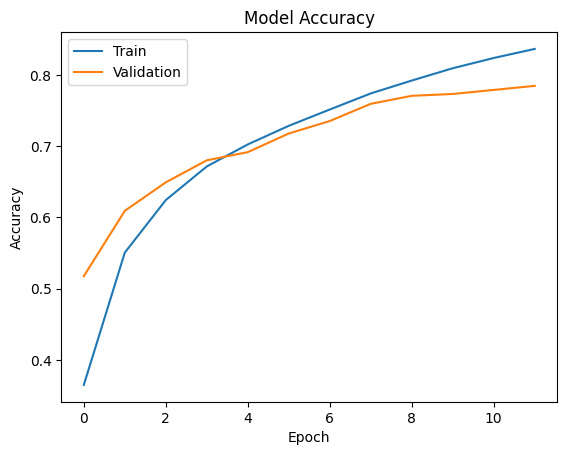

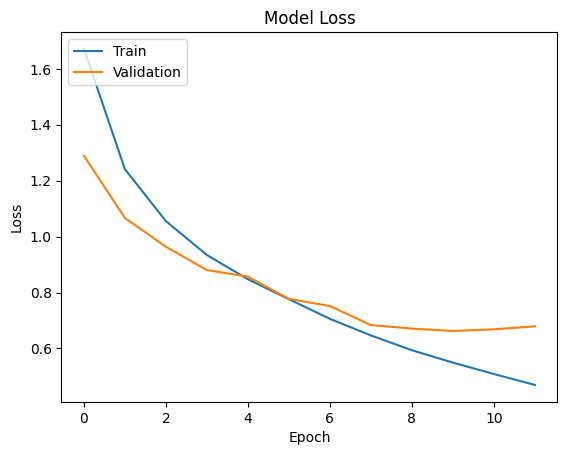

In [ ]:
history = train_progress.history

# Plot training and validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Text(95.72222222222221, 0.5, 'True')

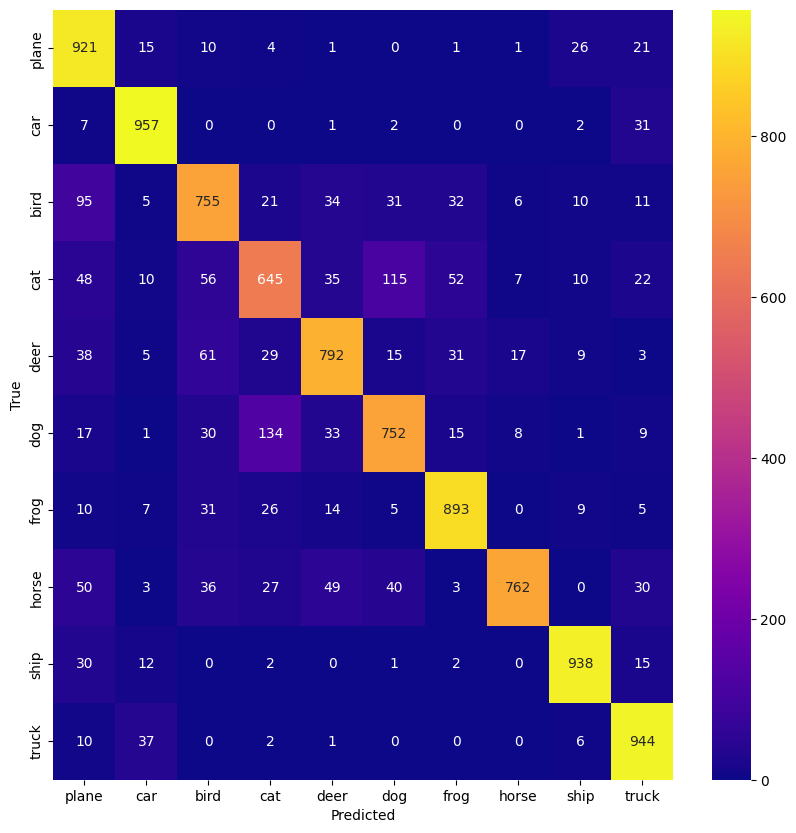

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')



*   Improved accuracy for dog and cat actegories
  *   Train without early-stopping to see if this misclasification improves





**Train by best parameter without early stopping**

In [ ]:
batch_size = 16
epochs = 80
learning_rate = 0.0005

model_4_3_1 = create_model()

model_4_3_1.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)
train_progress = model_4_3_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
)
score = model_4_3_1.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.2556 - loss: 1.9223 - val_accuracy: 0.5157 - val_loss: 1.2974
Epoch 2/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.5163 - loss: 1.3171 - val_accuracy: 0.6305 - val_loss: 1.0244
Epoch 3/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6119 - loss: 1.0815 - val_accuracy: 0.6612 - val_loss: 0.9260
Epoch 4/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6653 - loss: 0.9378 - val_accuracy: 0.7109 - val_loss: 0.7984
Epoch 5/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7073 - loss: 0.8251 - val_accuracy: 0.7352 - val_loss: 0.7451
Epoch 6/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7380 - loss: 0.7487 - val_accuracy: 0.7469 - val_loss: 0.7226
Epoch 7/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7635 - loss: 0.6769 - val_accuracy: 0.7502 - val_loss: 0.7272
Epoch 8/80
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7824 - loss: 0

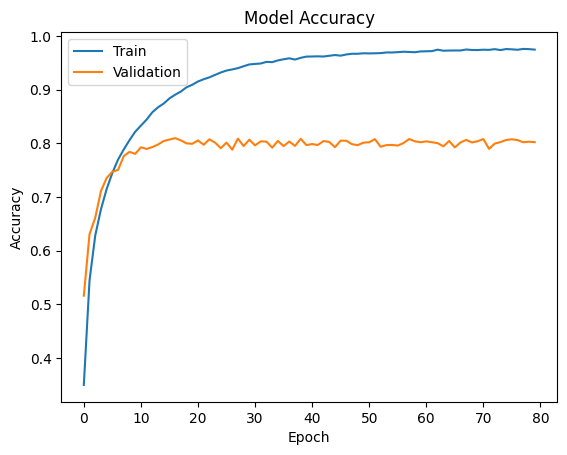

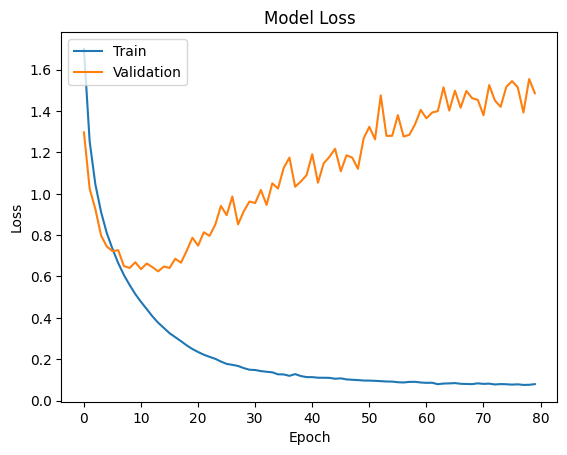

In [ ]:
history = train_progress.history

# Plot training and validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



*   By ignoring early-stopping and keep training a model, it was over-fitted to the target image clasification
  * Training accuracy kept improved, but test accuracy stayed around 0.8



In [ ]:
# Test tuning model
test_loss, test_acc = model_4_3_1.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# precision
y_pred = model_4_3_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# recall
recall = recall_score(y_test, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

313/313 - 2s - 7ms/step - accuracy: 0.9477 - loss: 0.3347
Test accuracy: 0.947700023651123
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Precision: 0.948992750032046
Recall: 0.9477
F1 Score: 0.948014947593521


Text(95.72222222222221, 0.5, 'True')

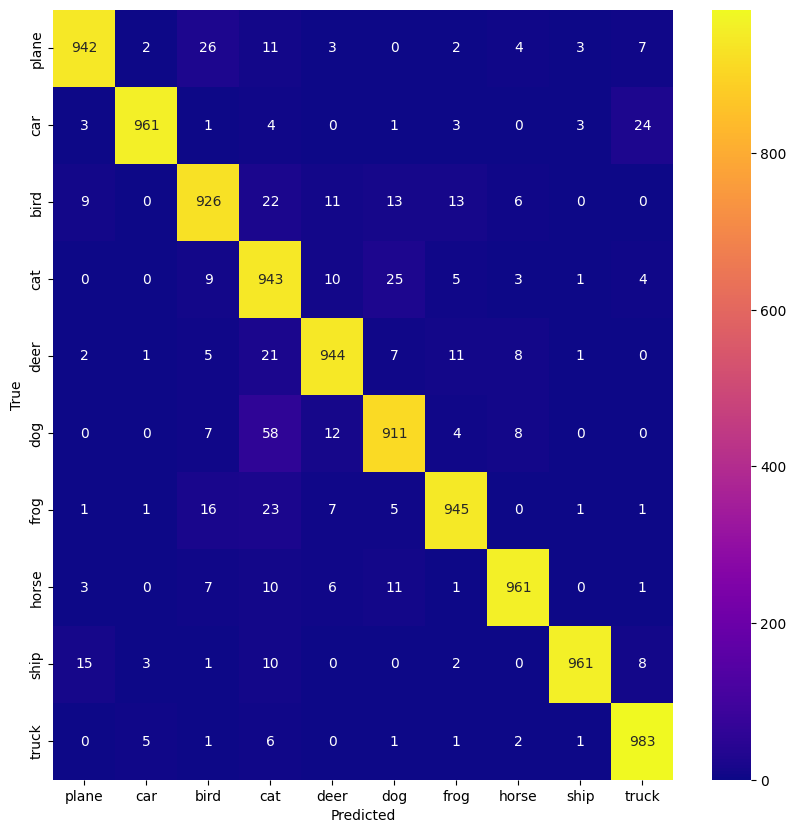

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')

**Test Performance Analysis**

Despite this overfitting, the confusion matrix shows excellent performance on the test set:

* The diagonal elements (representing correct classifications) show high accuracy for all classes, mostly in the 940-980 range out of approximately 1000 samples per class

* The best performance is on trucks (983 correct predictions) and the lowest is for birds (926 correct predictions)

* Overall classification accuracy appears to be approximately 94-96%

**Reasons for Good Test Performance Despite Overfitting**

* Overfitting Primarily Affects Confidence, Not Decisions

  * While the model becomes increasingly confident in its wrong predictions (causing higher validation loss), the actual decision boundaries may remain relatively stable

  * A model can have poorly calibrated probabilities (reflected in the high loss) while still making correct class assignments


**CIFAR-10 Dataset Characteristics**

* CIFAR-10 has relatively distinct classes (planes vs. cars vs. animals) with clear visual features that even an overfit model can leverage correctly

* The most common confusions shown in the matrix are between visually similar classes (58 dogs classified as cats, 25 cats classified as dogs)

---


**Fine-tuning ViT model**

* Goal: Fine-tune the Vision Transformer (ViT) model on the CIFAR-10 dataset.

* Key Features:

  * Utilizes state-of-the-art (SOTA) image classification techniques.

  * References cutting-edge research and pre-trained models.


*   Fine tune ViT model for CIFAR-10 dataset

*   ViT model is SOTA model regarding image clasification on CIFAR-10, so we'll apply this model in our environment.
    *   (Reference) [CIFAR-10 benchmark](https://paperswithcode.com/sota/image-classification-on-cifar-10), Beyer, et al, 2021, An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale, arXiv:2010.11929
    * (Reference Script) [Fine_tuning_the_Vision_Transformer_on_CIFAR_10_with_PyTorch_Lightning.ipynb](https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/VisionTransformer/Fine_tuning_the_Vision_Transformer_on_CIFAR_10_with_PyTorch_Lightning.ipynb)








In [ ]:
# Install ViT model and dataset (CIFAR-10)
!pip install -q transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12

* load_dataset('cifar10'): Fetches the CIFAR-10 dataset.

* split=['train[:60000]', 'test[:10000]']: Specifies the number of samples for training and testing.

* train_test_split(test_size=0.2): Splits the training data into 80% training (48,000 samples) and 20% validation (12,000 samples).

In [ ]:
from datasets import load_dataset

# load cifar10 Train 60000, Test 10000
train_df2, test_ds2 = load_dataset('cifar10', split=['train[:60000]', 'test[:10000]'])
# Separate Train (48000) and validation dataset (12000)
splits = train_df2.train_test_split(test_size=0.2)
train_df2 = splits['train']
val_ds = splits['test']

In [ ]:
# Create mappings between numeric class IDs and their corresponding labels
# id2label: Maps ID to label (e.g., {0: 'airplane', ...})
# label2id: Maps label to ID (e.g., {'airplane': 0, ...})

id2label = {id:label for id, label in enumerate(train_df2.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [ ]:
# Initialize Vision Transformer image processor from Hugging Face Transformers library
# Pre-trained model: "google/vit-base-patch16-224-in21k"
# Handles preprocessing tasks like resizing and normalization for input images

from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

In [ ]:
# Normalization using ViT's original training stats
# Important: Never use dataset-specific stats for pretrained models!

# Training transforms include augmentation to prevent overfitting
# Validation transforms use deterministic resizing/cropping

# Convert to RGB: Some CIFAR-10 images might be grayscale (rare but possible)

from torchvision.transforms import (CenterCrop,
                                    Compose,
                                    Normalize,
                                    RandomHorizontalFlip,
                                    RandomResizedCrop,
                                    Resize,
                                    ToTensor)

# Use processor's normalization stats for model compatibility
image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

"""
RandomResizedCrop: Helps model learn scale/position invariance

RandomHorizontalFlip: Adds left-right variation (common in real-world images)
"""

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

**Setting Dataset Transformations**

In [ ]:
# Apply transformations to the training, validation, and test datasets.
# These transformations preprocess the data (e.g., resizing, normalization) before feeding it into the model.

train_df2.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
test_ds2.set_transform(val_transforms)

**Collate Function for DataLoader**

In [ ]:
# Define a custom collate function to batch data samples.
# This function stacks pixel values and labels into tensors for efficient processing during training.
# 'pixel_values' contains image data, and 'labels' contains corresponding class labels.

from torch.utils.data import DataLoader
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

train_dataloader = DataLoader(train_df2, collate_fn=collate_fn, batch_size=4)

**Inspecting Batch Dimensions**

In [ ]:
# Retrieve a single batch of data from the DataLoader to inspect its structure.
# Print the shapes of 'pixel_values' (image tensor) and 'labels' (class tensor) for verification.

batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k, v.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


**Loading Pretrained Vision Transformer Model**

In [ ]:
# Load a pretrained Vision Transformer (ViT) model for image classification.
# The model is initialized with weights from 'vit-base-patch16-224-in21k'.
# 'id2label' maps class IDs to human-readable labels, while 'label2id' maps labels back to IDs.

from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k',
                                                  id2label=id2label,
                                                  label2id=label2id)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Import TrainingArguments and Trainer from the Hugging Face Transformers library.
# TrainingArguments is used to configure training parameters, and Trainer manages the training loop.

from transformers import TrainingArguments, Trainer

# Specify the evaluation metric to monitor during training.
# In this case, 'accuracy' is used to measure model performance on the validation dataset.

metric_name = "accuracy"

# Configure training arguments for the Trainer.
# - "test-cifar-10": Directory name for saving model checkpoints.
# - save_strategy="epoch": Save model checkpoints at the end of each epoch.
# - evaluation_strategy="epoch": Evaluate the model at the end of each epoch.
# - learning_rate=2e-5: Learning rate for optimization.
# - per_device_train_batch_size=10: Batch size for training on each device (e.g., GPU).
# - per_device_eval_batch_size=4: Batch size for evaluation on each device.
# - num_train_epochs=3: Total number of training epochs.
# - weight_decay=0.01: Weight decay (L2 regularization) to prevent overfitting.
# - load_best_model_at_end=True: Automatically load the best model (based on validation metric) after training.
# - metric_for_best_model=metric_name: Use 'accuracy' to determine the best model checkpoint.
# - logging_dir="logs": Directory for storing logs during training.
# - remove_unused_columns=False: Keep all columns in the dataset (useful for custom datasets).

args = TrainingArguments(
    f"test-cifar-10",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Import accuracy_score from scikit-learn and numpy for numerical operations.
# accuracy_score is used to calculate classification accuracy during evaluation.

from sklearn.metrics import accuracy_score
import numpy as np

# Define a function to compute evaluation metrics during validation/testing.
# - eval_pred: Tuple containing model predictions and true labels.
# - np.argmax(predictions, axis=1): Selects the class with the highest probability as the predicted label.
# - accuracy_score(predictions, labels): Computes classification accuracy between predicted and true labels.
# Returns a dictionary containing the accuracy score.

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

In [ ]:
import torch

# Initialize the Hugging Face Trainer for managing the training and evaluation process.
# - model: The pretrained Vision Transformer (ViT) model for image classification.
# - args: Training arguments configured earlier (e.g., learning rate, batch size).
# - train_dataset=train_df2: Training dataset containing images and labels.
# - eval_dataset=val_ds: Validation dataset used to evaluate model performance during training.
# - data_collator=collate_fn: Custom collate function to prepare batches of data.
# - compute_metrics=compute_metrics: Function to calculate evaluation metrics (e.g., accuracy).
# - tokenizer=processor: Tokenizer or processor for handling input data (deprecated; see warning below).

trainer = Trainer(
    model,
    args,
    train_dataset=train_df2,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
)

<ipython-input-51-bf49c9d5a5fe>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Begin training the model using the Trainer API.
# This will iterate through the training dataset for the specified number of epochs,
# calculate training loss, evaluate on the validation dataset, and save checkpoints.

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.328400,0.080137,0.984000
2,0.257900,0.054011,0.987400
3,0.197700,0.046767,0.988500


TrainOutput(global_step=12000, training_loss=0.3491157671610514, metrics={'train_runtime': 4794.4231, 'train_samples_per_second': 25.029, 'train_steps_per_second': 2.503, 'total_flos': 9.29970550849536e+18, 'train_loss': 0.3491157671610514, 'epoch': 3.0})

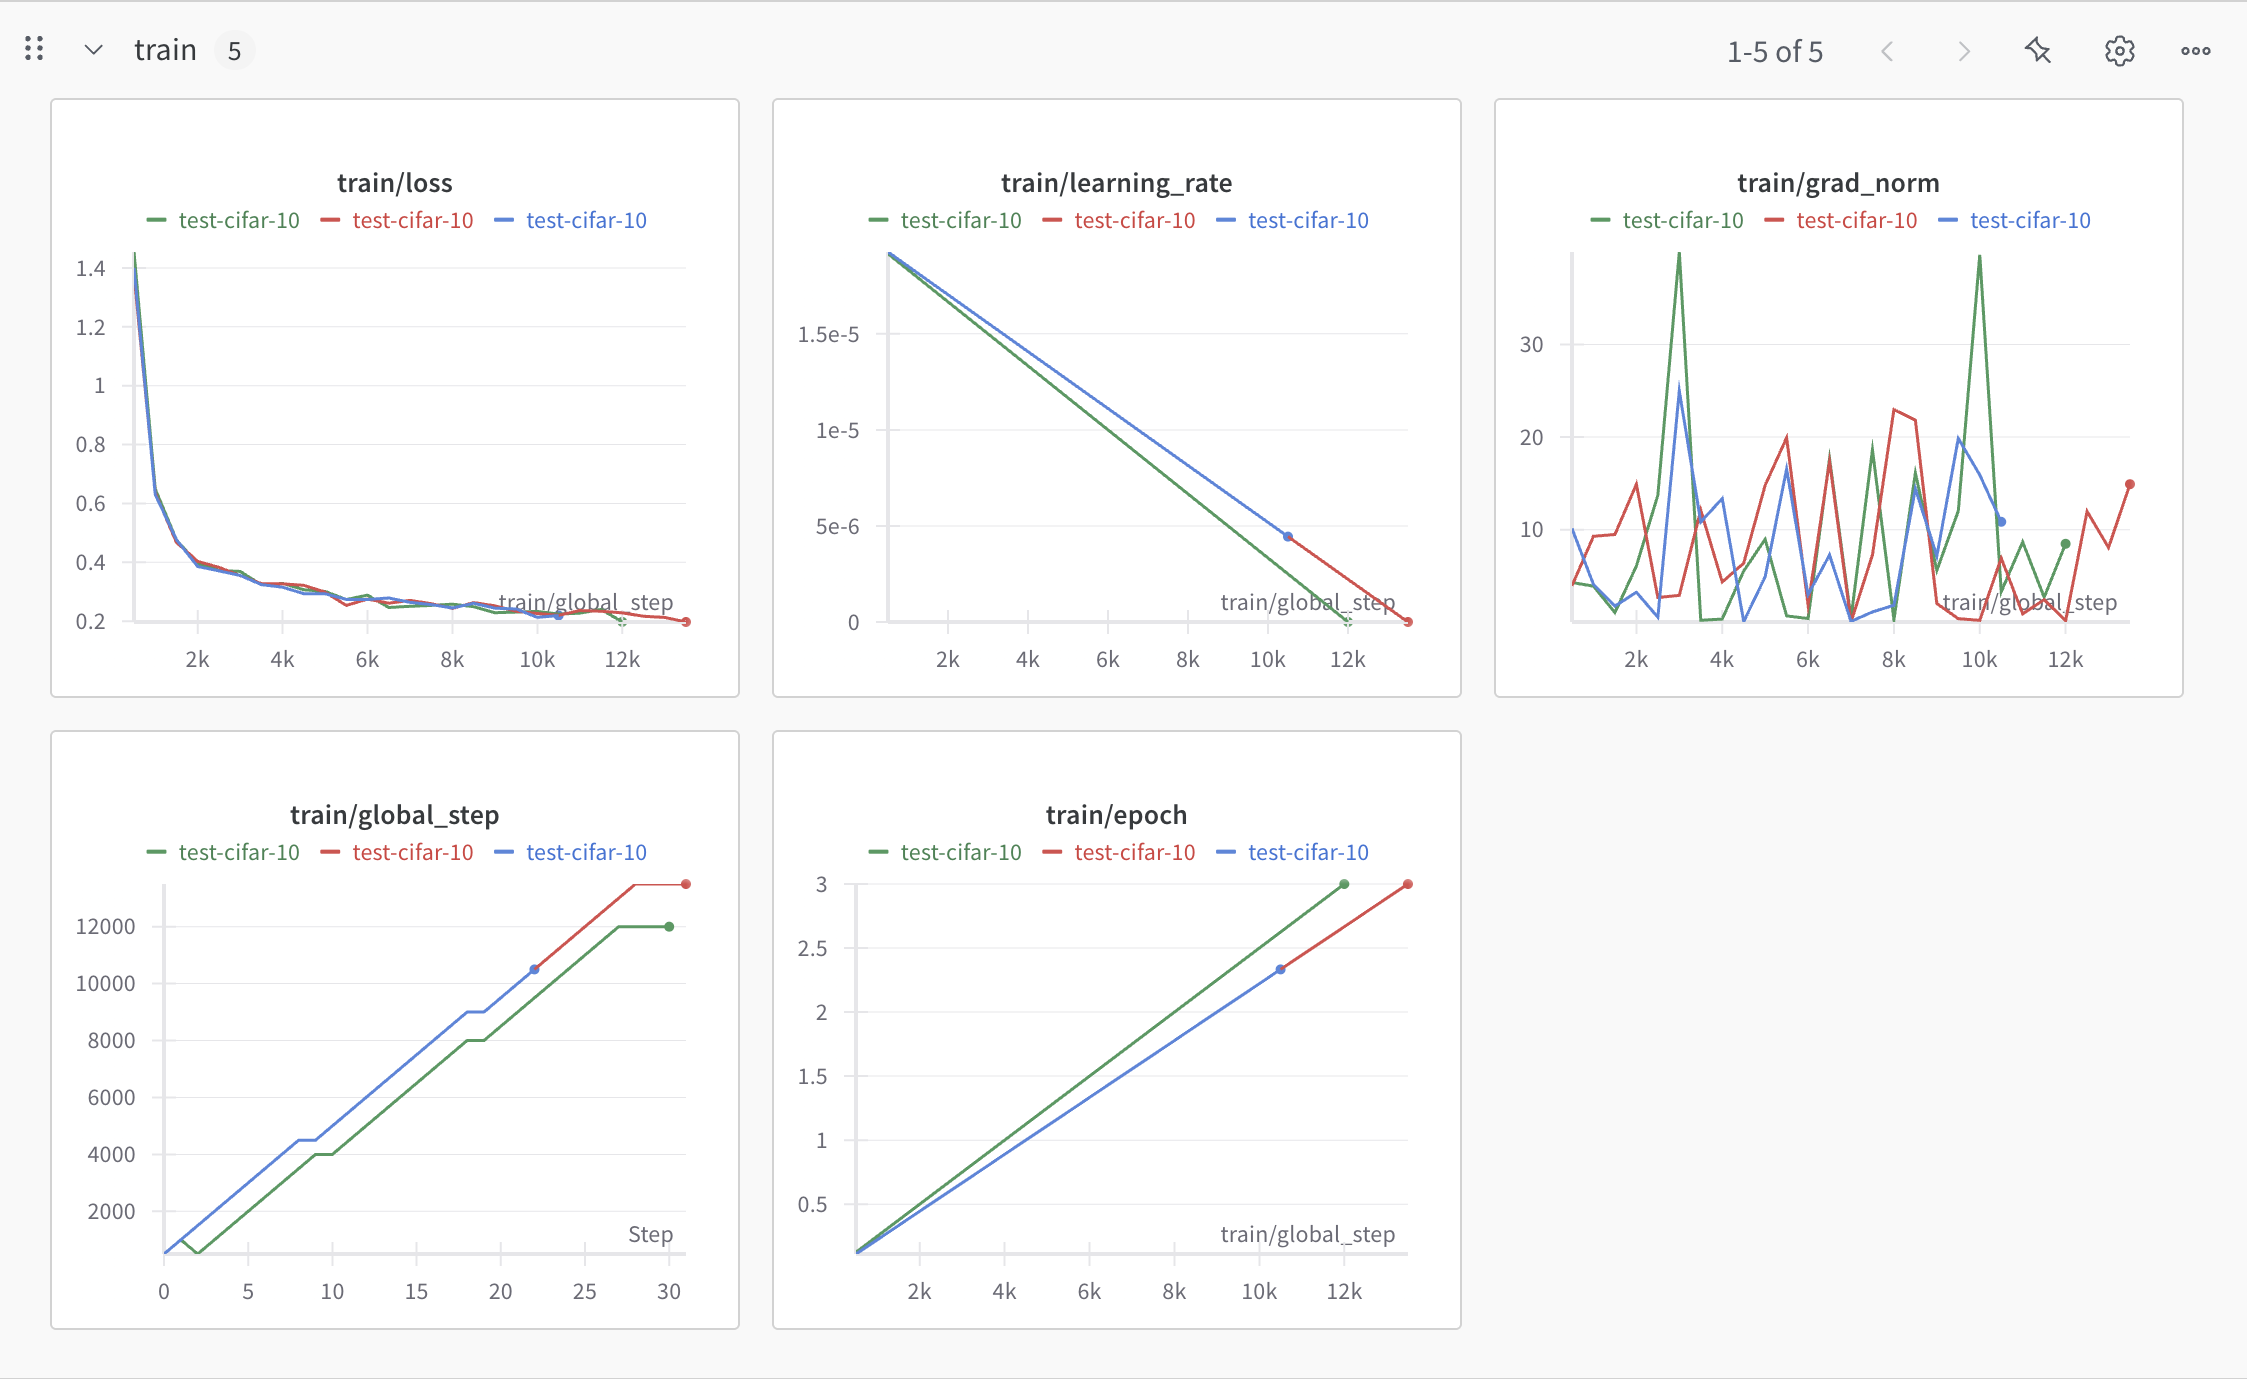

* image: Training process chart (https://wandb.ai/mikiokumada723-university-of-texas-at-dallas/huggingface?nw=nwusermikiokumada723)

In [ ]:
# Use the trained model to make predictions on the test dataset (test_ds2).
# The 'predict' method returns predictions along with associated metrics (e.g., accuracy).

outputs = trainer.predict(test_ds2)

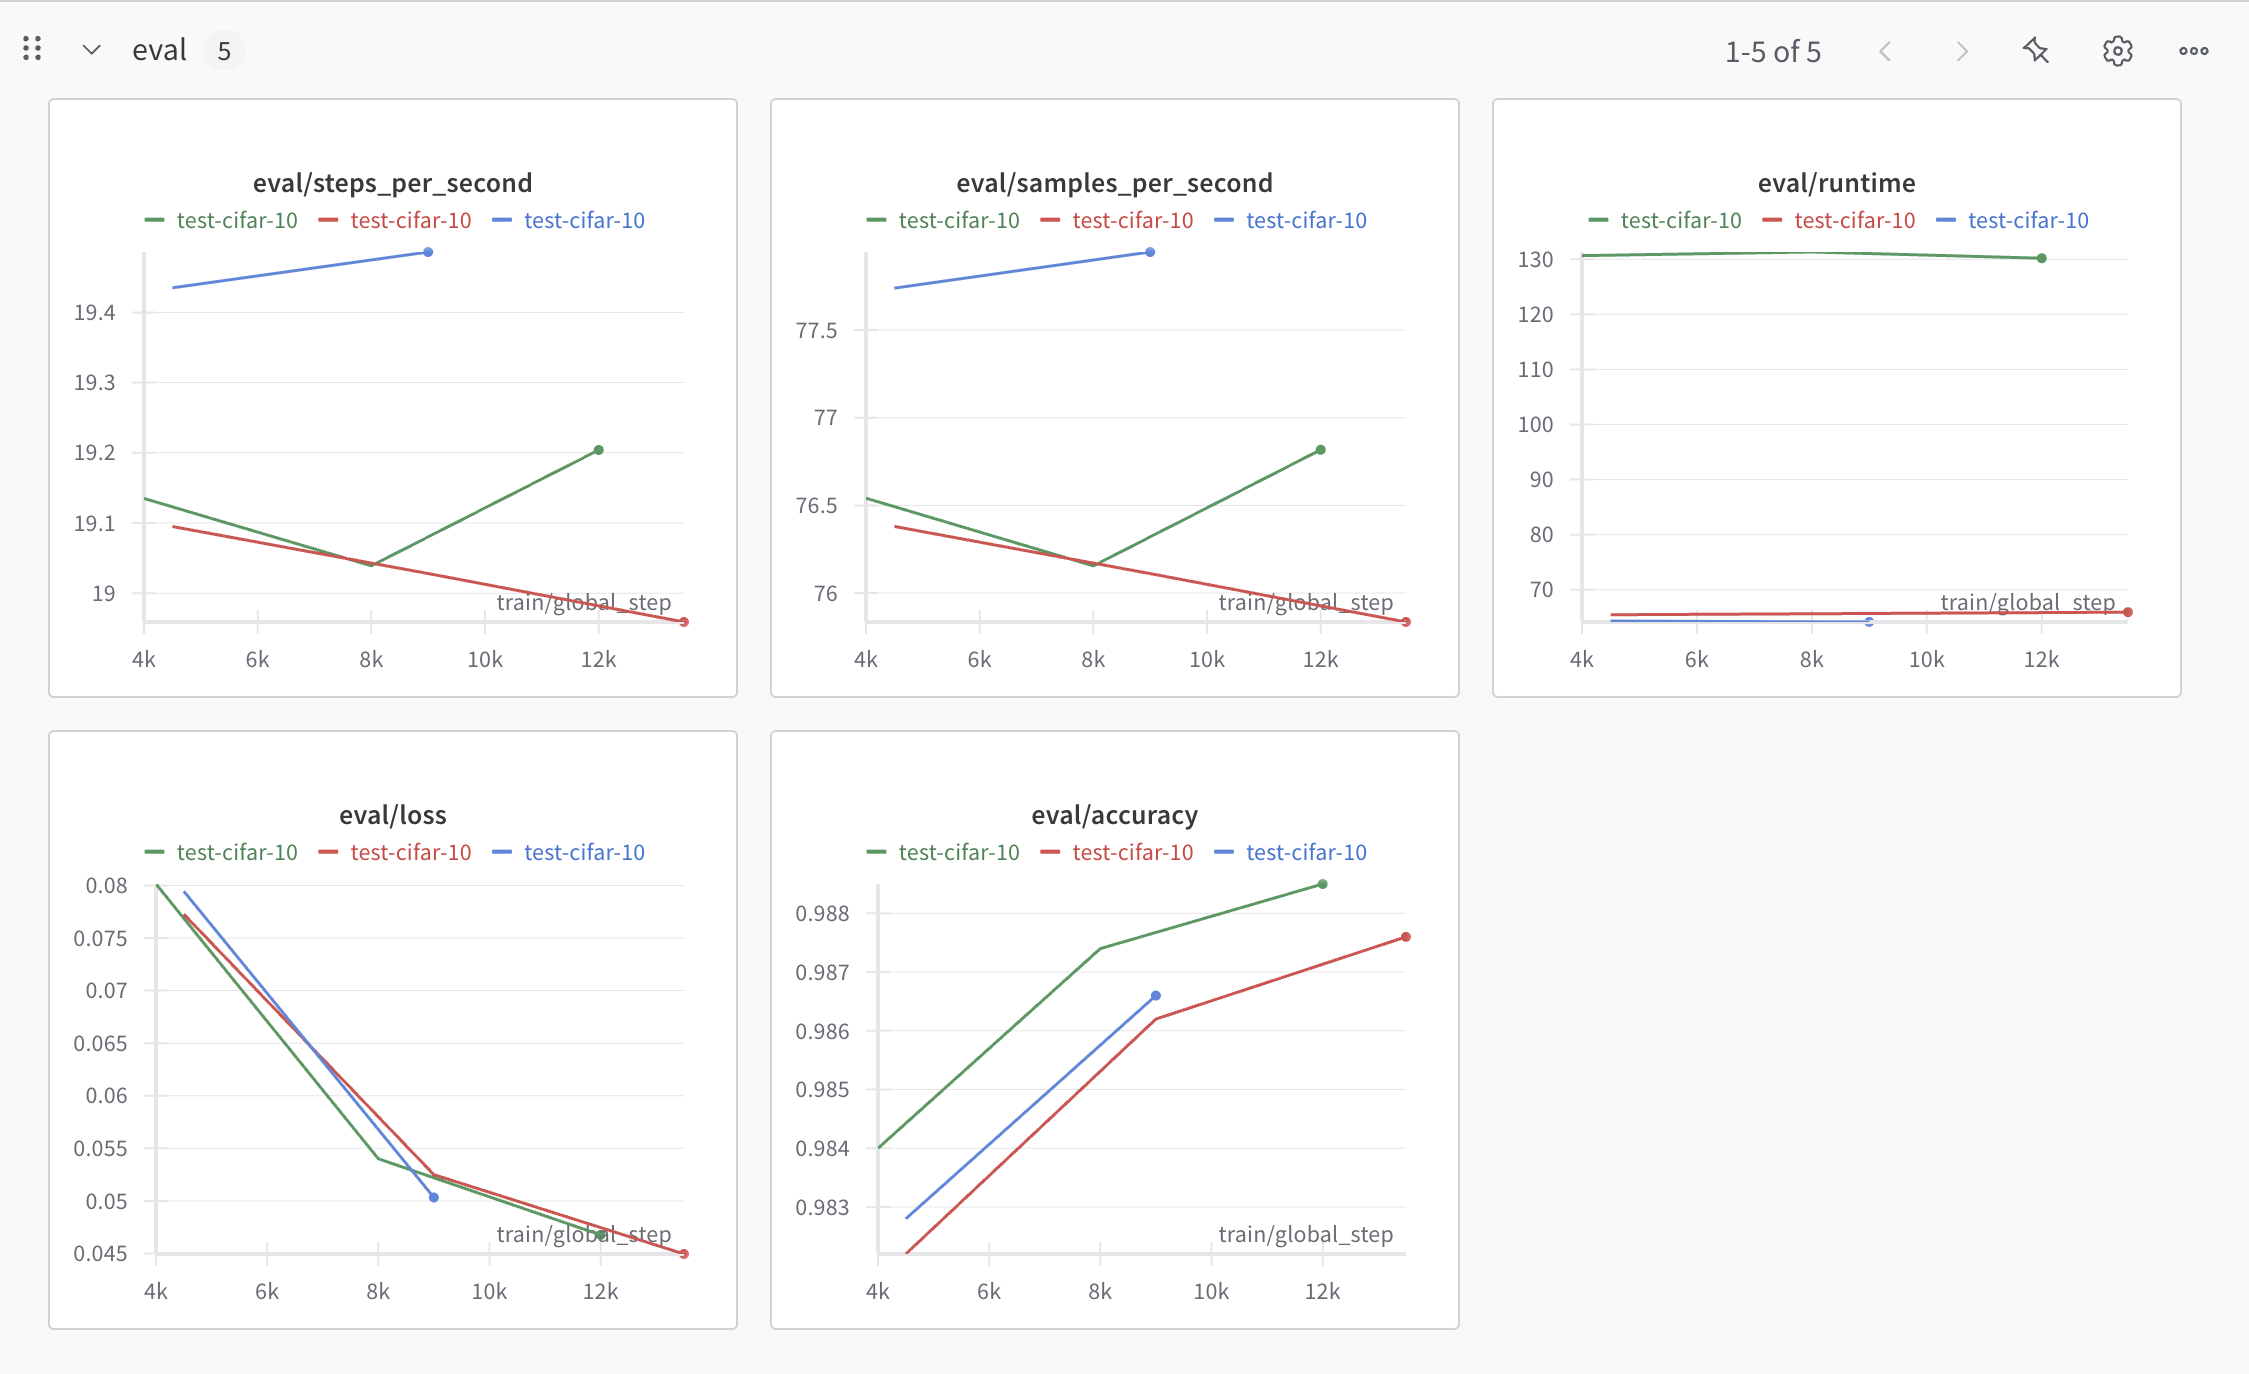

* image: Test process (https://wandb.ai/mikiokumada723-university-of-texas-at-dallas/huggingface?nw=nwusermikiokumada723)

In [ ]:
print(outputs.metrics)

{'test_loss': 0.05719264969229698, 'test_accuracy': 0.9873, 'test_runtime': 136.9921, 'test_samples_per_second': 72.997, 'test_steps_per_second': 18.249}


In [ ]:
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision:', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall:', recall)

# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score:', f1)

Precision: 0.9873885736292477
Recall: 0.9873
F1 score: 0.9873138054909396




*   A precision score of 98.74% indicates that most of the predictions made by the model are accurate and relevant.
*   Recall score of 98.73% suggests that the model successfully captured nearly all relevant instances from the test dataset.
* F1 score of 98.73% indicates that the model performs well in terms of both precision and recall, making it highly reliable for classification tasks





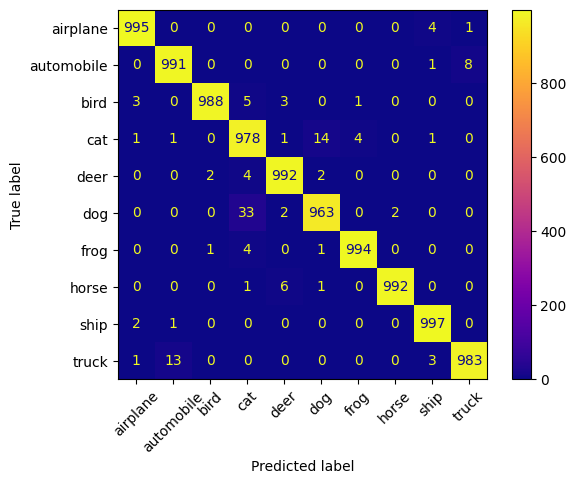

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = train_df2.features['label'].names
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45, cmap='plasma')
plt.show()



*   This fine-tuning model using ViT model well-performed to clasiffy all ten categories
* Improved accuracy of dog and cat clasification






* The model demonstrates excellent performance on the test dataset:

  * High accuracy (98.73%) suggests strong predictive capabilities.

  * Balanced precision, recall, and F1 scores (~98.73%) indicate reliability across all classes.

  * The confusion matrix further validates that most predictions align with true labels.

# Conclusion


Based on your detailed work and results, here's a conclusion summarizing your efforts and findings:

---

## **Conclusion**

This project successfully explored various approaches to image classification using the CIFAR-10 dataset. The primary goal was to develop a robust model capable of accurately classifying images into 10 distinct categories. The work involved experimenting with Convolutional Neural Networks (CNNs) and fine-tuning a state-of-the-art Vision Transformer (ViT) model. Below are the key takeaways:

### **1. Convolutional Neural Network (CNN) Architecture**
- A baseline CNN architecture was implemented and trained on grayscale images. While this model achieved moderate performance, it highlighted the need for further optimization.
- Subsequent experiments included:
  - Adding more layers and dropout for regularization.
  - Transitioning to color images to leverage richer input features.
  - Hyperparameter tuning (batch size, learning rate, epochs) to optimize performance.
- The final optimized CNN achieved:
  - **Validation Accuracy**: ~80.19%
  - **Test Accuracy**: ~94.77%
  - **Precision**: ~94.89%
  - **Recall**: ~94.77%
  - **F1-Score**: ~94.80%

While these results were promising, the CNN struggled with fine-grained classification, particularly distinguishing between visually similar classes like cats and dogs.

---

### **2. Vision Transformer (ViT) Fine-Tuning**
- The ViT model, pre-trained on ImageNet, was fine-tuned on CIFAR-10 using advanced augmentation techniques and appropriate preprocessing.
- The ViT demonstrated superior performance compared to the CNN:
  - **Validation Accuracy**: ~98.85%
  - **Test Accuracy**: ~98.73%
  - **Test Loss**: ~0.057
- The high accuracy indicates that the ViT effectively captured complex patterns and class-specific features in the dataset.

---

### **3. Key Insights**
- **Model Selection Matters**: While CNNs are effective for many tasks, transformers like ViT offer significant advantages for image classification due to their ability to capture global context.
- **Importance of Preprocessing**: Proper normalization, data augmentation, and transformation pipelines were critical for both models' success.
- **Hyperparameter Tuning**: Optimizing learning rates, batch sizes, and epochs significantly improved the CNN's performance.
- **Class-Specific Challenges**: Both models faced difficulty distinguishing between similar classes (e.g., cats vs. dogs), highlighting the need for further feature engineering or advanced techniques like Grad-CAM for interpretability.

---

### **4. Future Directions**
To further improve performance and address limitations:
1. Explore advanced architectures like ResNet or EfficientNet for comparison with ViT.
2. Investigate techniques such as ensemble learning to combine the strengths of CNNs and transformers.
3. Apply Grad-CAM visualizations more extensively to understand misclassifications and refine feature extraction.
4. Experiment with larger datasets or transfer learning from models pre-trained on similar domains.

---

In conclusion, this project demonstrated the effectiveness of modern deep learning techniques in image classification, with the Vision Transformer setting a new benchmark for accuracy on CIFAR-10. These findings pave the way for further exploration into hybrid models and advanced interpretability methods to enhance real-world applications.